## Insurance Fraudulent Claim Detection

### Problem Statement:

### Problem Statement

Global Insure, a leading insurance company, processes thousands of claims annually. However, a significant percentage of these claims turn out to be fraudulent, resulting in considerable financial losses. The company’s current process to identify fraudulent claims involves manual inspections, which is time-consuming and inefficient. Fraudulent claims are often detected too late in the process, after the company has already paid out significant amounts. Global Insure wants to improve its fraud detection process using data-driven insights to classify claims as fraudulent or legitimate early in the approval process. This would minimise financial losses and optimise the overall claims handling process.

### Business Objective
Global Insure wants to build a model to classify insurance claims as either fraudulent or legitimate based on historical claim details and customer profiles. By using features like claim amounts, customer profiles and claim types, the company aims to predict which claims are likely to be fraudulent before they are approved.

This project utilizes Machine Learning models to assist the Auto Insurance sector in addressing this issue.


# Exploratory Data Analysis (EDA)

## **1. Data Preparation**

In [41]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

### Importing DataSet

In [42]:
df = pd.read_csv("insurance_claims.csv")

In [43]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


The dataset contains both categorical and numerical columns. In the given dataset, "fraud_reported" is our target column. As this column has two categories so it is termed to be "Classification Problem" where we need to predict if an insurance claim is fraudu or not.

In [44]:
# Checking dimension of dataset
df.shape

(1000, 40)

The dataset contains 1000 rows and 40 columns. Out of 40 columns 39 are independent columns and remaining one is our target variable "fraud_reported".

In [45]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [46]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [47]:
df.sample(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
527,285,47,729534,1991-09-30,IN,100/300,1000,1216.68,0,610989,...,NO,2700,300,300,2100,Ford,F150,2013,N,NaN
109,87,31,853360,2009-06-26,IN,500/1000,1000,1074.07,0,451312,...,YES,60940,5540,11080,44320,Nissan,Ultima,2006,Y,NaN
674,25,38,944953,1995-12-07,OH,250/500,1000,1540.91,7000000,608807,...,YES,4320,480,960,2880,Toyota,Corolla,1995,N,NaN
67,478,64,346002,1990-08-20,OH,250/500,500,835.02,0,602433,...,NO,33930,0,3770,30160,BMW,X6,1998,N,NaN
450,33,32,263159,2008-03-07,OH,100/300,500,1402.78,5000000,469383,...,?,56070,6230,12460,37380,Toyota,Camry,2012,N,NaN
223,362,50,114839,2006-01-01,IL,250/500,500,1198.34,4000000,619735,...,NO,57060,6340,6340,44380,Mercedes,E400,1995,N,NaN
495,261,46,156636,2000-09-10,IN,100/300,1000,870.55,0,465631,...,?,80280,13380,13380,53520,Chevrolet,Tahoe,2013,N,NaN
452,101,33,552788,1991-09-03,IL,500/1000,1000,1313.64,0,438617,...,NO,4290,780,390,3120,Audi,A3,1997,N,NaN
47,355,47,939631,1990-03-18,OH,500/1000,2000,1273.70,4000000,433473,...,NO,62800,6280,6280,50240,Audi,A3,2003,Y,NaN
334,96,30,406567,2001-09-25,OH,100/300,500,1399.27,6000000,448913,...,YES,53440,0,6680,46760,Ford,Escape,2004,N,NaN


In [48]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

## Feature columns:

Let's try to analyze the given columns and split them in three categories

<b>Company's data for insurance claim policy : </b> months_as_customer, age, policy_number(dropped), policy_bind_date, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit

<b> Customer Personal details : </b> insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital- gains, capital-loss.

<b> Details of the incident : </b> incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location(dropped), incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_amount_claimed, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year

<b> Target Variable: </b>

fraud_reported : Y-YES / N-NO

In [49]:
# Get the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [50]:
# Checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Here the column _c39 has 0 non null values which means it has NaN throughout the data so we can drop this column.

In [51]:
# Dropping _c39 column
df.drop("_c39",axis=1,inplace=True)

In [52]:
# Checking null values
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

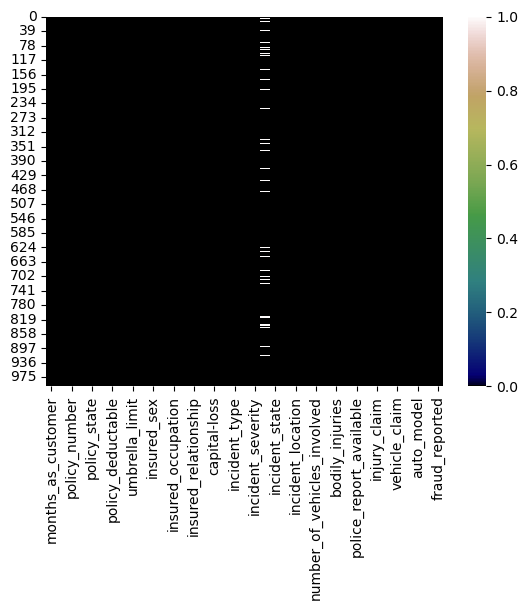

In [53]:
# Visualize the null values through heatmap
sns.heatmap(df.isnull(), cmap="gist_earth")
plt.show()

We can clearly observe that there are null values present in the data.

In [54]:
# Check the datatype of each column in dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The dataset contains 3 different datatypes- integer , float and object.

In [55]:
# Check the number of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


# Data Preprocessing

## Feature selection

We can observe the columns policy_number and incident_location have 1000 unique values. As these are not required for the prediction we can drop them.

In [56]:
# Drop policy_number and incident_location columns
df.drop("policy_number",axis=1,inplace=True)
df.drop("incident_location",axis=1,inplace=True)

In [57]:
# Check the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*60)

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64
************************************************************
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64
************************************************************
policy_bind_date
2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: count, Length: 951, dtype: int64
*********************************************

These are the list of value counts in each columns.

By looking at the value counts of each column we can realize that the columns umbrella_limit, capital-gains and capital-loss contains more zero values around 79.8%, 50.8% and 47.5%. I am keeping the zero values in capital_gains and capital_loss columns as it is. Since the umbrella_limit columns has more that 70% of zero values, let's drop that column.

Also the collision_type, police_report_available and property_damage have ? in them

In [58]:
# Dropping umbrella_limit column
df.drop("umbrella_limit",axis=1,inplace=True)

The column insured_zip is the zip code given to each person. If we take a look at the value count and unique values of the column insured_zip, it contains 995 unique values that means the 5 entries are repeating.

In [59]:
# Dropping insured_zip column as it is not important for the prediction
df.drop('insured_zip',axis=1,inplace=True)

## Feature Extraction

The policy_bind_date and incident_date have object data type which should be in datetime data type that means the python is not able to understand the type of these column and giving default data type. We will convert this object data type to datetime data type and we will extract the vaues from these columns.

In [60]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [61]:
# Again checking the type of dataset
df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                          object
incident_hour_of_the_day          

Now we have converted object data type into datetime data type. Now let's extract Day, Month and Year from both the columns

In [62]:
# Extracting Day, Month and Year column from policy_bind_date
df["policy_bind_Day"] = df['policy_bind_date'].dt.day
df["policy_bind_Month"] = df['policy_bind_date'].dt.month
df["policy_bind_Year"] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df["incident_Day"] = df['incident_date'].dt.day
df["incident_Month"] = df['incident_date'].dt.month
df["incident_Year"] = df['incident_date'].dt.year

Now we have extracted Day, Month and Year columns from both policy_bind_date and incident_date columns. So we can drop these columns.

In [63]:
# Dropping policy_bind_date and incident_date columns
df.drop(["policy_bind_date","incident_date"],axis=1,inplace=True)

We have dropped the columns policy_bind_date and incident_date as we have extracted the required data from those columns.

From the value counts of the columns we can also observe the some columns have "?" values, they are not NAN values but we need to fill them.

In [64]:
# Checking which columns contains "?" sign
df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

These are the columns which contains "?" sign. Since these column seems to be categorical so we will replace "?" values with most frequently occuring values of the respective columns that is their mode values.

In [65]:
# Checking mode of the above columns
print("The mode of collision_type is:",df["collision_type"].mode())
print("The mode of property_damage is:",df["property_damage"].mode())
print("The mode of police_report_available is:",df["police_report_available"].mode())

The mode of collision_type is: 0    Rear Collision
Name: collision_type, dtype: object
The mode of property_damage is: 0    ?
Name: property_damage, dtype: object
The mode of police_report_available is: 0     ?
1    NO
Name: police_report_available, dtype: object


The mode of property_damage and police_report_available is "?", which means the data is almost covered by "?" sign. So we will fill them by the second highest count of the respective column.

In [66]:
# Checking value count of property_damage column and police_report_available
print("The value count of property_damage:\n", df["property_damage"].value_counts())
print("\n")
print("The value count of police_report_available:\n", df["police_report_available"].value_counts())

The value count of property_damage:
 property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64


The value count of police_report_available:
 police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64


Here "NO" is the second highest occured category in both property_damage and police_report_available column. We will replace "?" by "NO".

In [67]:
# Replacing "?" by their mode values
df['collision_type'] = df.collision_type.str.replace('?', df['collision_type'].mode()[0])
df['property_damage'] = df.property_damage.str.replace('?', "NO")
df['police_report_available'] = df.police_report_available.str.replace('?', "NO")

In [68]:
# Checking value count again
print("The value count of collision_type:\n", df["collision_type"].value_counts())
print("\n")
print("The value count of property_damage:\n", df["property_damage"].value_counts())
print("\n")
print("The value count of police_report_available:\n", df["police_report_available"].value_counts())

The value count of collision_type:
 collision_type
Rear Collision     470
Side Collision     276
Front Collision    254
Name: count, dtype: int64


The value count of property_damage:
 property_damage
NO     698
YES    302
Name: count, dtype: int64


The value count of police_report_available:
 police_report_available
NO     686
YES    314
Name: count, dtype: int64


Here we have replaced the "?" sign by mode and "NO" values.

The policy_csl column showing object data type but it contains numerical data, may be it is because of the presence of "/" in that column. So first we will extract two columns csl_per_person and csl_per_accident from policy_csl colums and then will convert their object data type into integer data type.

In [69]:
# Extracting csl_per_person and csl_per_accident from policy_csl column
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [70]:
# Converting object data type into integer data type
df['csl_per_person'] = df['csl_per_person'].astype('int64')
df['csl_per_accident'] = df['csl_per_accident'].astype('int64')

In [71]:
# Since we have extracted the data from policy_csl, let's drop that column
df.drop("policy_csl",axis=1,inplace=True)

In [72]:
# Let's extract age of the vehicle from auto_year by subtracting it from the year 2018
df["Vehicle_Age"] = 2018 - df["auto_year"]
df.drop("auto_year",axis=1, inplace = True)

Here we have extracted age of the vehicle on the basis of auto year by assuming the data is collected in the year 2018.

In [73]:
# Let's check the unique values again
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
months_as_customer,391
age,46
policy_state,3
policy_deductable,3
policy_annual_premium,991
insured_sex,2
insured_education_level,7
insured_occupation,14
insured_hobbies,20
insured_relationship,6


These are the unique values present in each column after feature extraction and selection. Here incident_Year column has one unique value through out the column also it is not important for our prediction so we can drop this column.

In [74]:
# Dropping incident_Year column 
df.drop("incident_Year", axis=1, inplace=True)

In [75]:
# Let's take a look at the dataframe after preprocessing
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,csl_per_person,csl_per_accident,Vehicle_Age
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,92x,Y,17,10,2014,25,1,250,500,14
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,E400,Y,27,6,2006,21,1,250,500,11
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,RAM,N,6,9,2000,22,2,100,300,11
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,Tahoe,Y,25,5,1990,10,1,250,500,4
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,RSX,N,6,6,2014,17,2,500,1000,9


In [76]:
df.shape

(1000, 39)

In [77]:
# Separate numerical and categorcal columns

# Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)

Categorical columns are:
 ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [78]:
#Numerical Columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)

Numerical columns are:
 ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_Day', 'policy_bind_Month', 'policy_bind_Year', 'incident_Day', 'incident_Month', 'csl_per_person', 'csl_per_accident', 'Vehicle_Age']


In [79]:
# Check the unique Values of target column
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

The above are the two unique categories in fraud_reported column that represent if an insurance claim is fraudulent or not. We can asssume "Y" for "Yes" that is the insurance is fraudulent and "N" for "No" means the insurance claim is not fraudulent.

In [80]:
# Count the unique values in target column
df['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

From the above values count, we can notice that the difference between the count of the categories is huge i.e., 247 vs 753, which means the data is not balanced. So we will use oversampling method to balance the data before building the models.

# Statistical Summary of Dataset

In [81]:
# Statistical summary of numerical columns
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,NaN,NaN,NaN,203.954,115.113174,0.0,115.75,199.5,276.25,479.0
age,1000.0,NaN,NaN,NaN,38.948,9.140287,19.0,32.0,38.0,44.0,64.0
policy_state,1000,3,OH,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000.0,NaN,NaN,NaN,1136.0,611.864673,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,1000.0,NaN,NaN,NaN,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
insured_sex,1000,2,FEMALE,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insured_education_level,1000,7,JD,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insured_occupation,1000,14,machine-op-inspct,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insured_hobbies,1000,20,reading,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insured_relationship,1000,6,own-child,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we use "describe" method along with it's parameter "all" to include each column present in our dataset irrespective of them being numeric or text data. We have used transpose method to see the column information properly without scrolling  multiple times.

From the above dataset, we can infer below details:

The counts of all the columns are equal => no missing values in the dataset.

In some columns like policy_deductable, capital-gains, injury_claim etc, mean value is greater than the median(50%), => data in these columns are skewed to right. 

Columns like total_claim_amount, vehicle_claim etc, the mean is less than the median => data in these columns are skewed to left. 

Columns like policy_annual_premium have equal mean and median that means the data is symmetric and is normally distributed and no skewness present.

# Data Visualization

## Univariate Analysis (Categorical Columns)

fraud_reported
N    753
Y    247
Name: count, dtype: int64


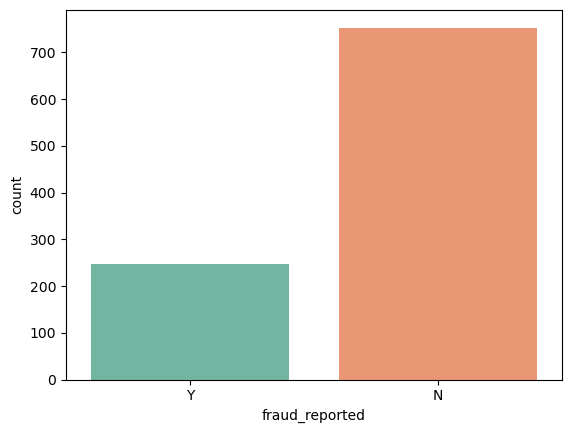

In [82]:
#Visualize how many insurance claims are fraudulent
print(df["fraud_reported"].value_counts())
sns.countplot(df["fraud_reported"], x= df["fraud_reported"], palette="Set2")
plt.show()

From the plot we can observe that the count of "N" is high compared to "Y". 

We will balance the data using oversampling method in later part.

Pie plot for the column: policy_state


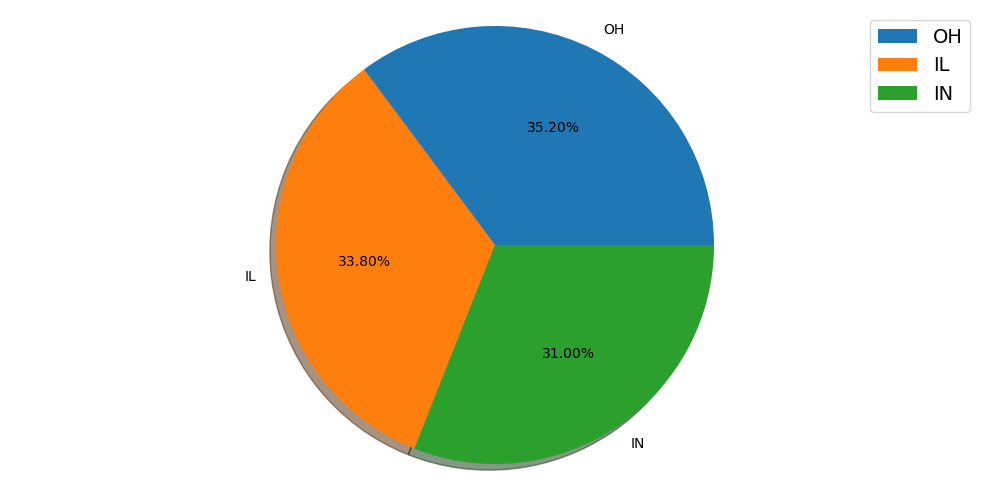

Pie plot for the column: insured_sex


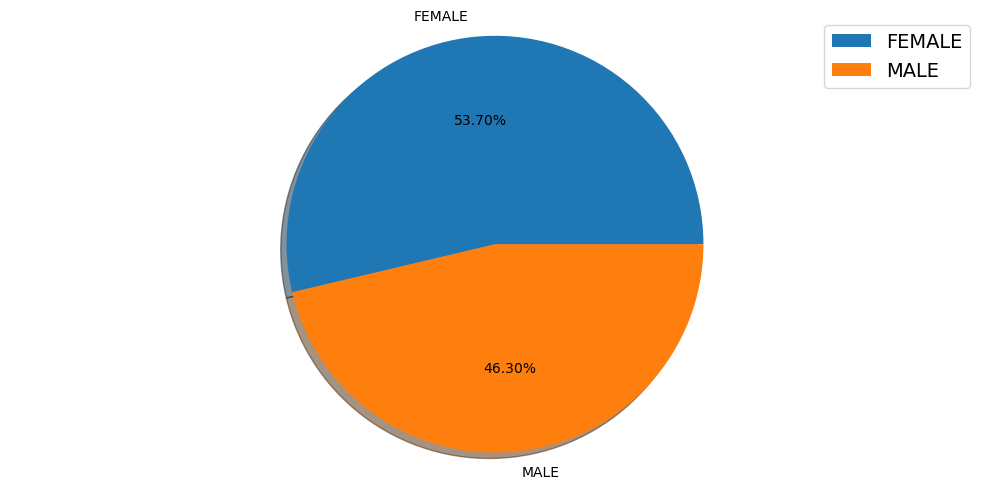

Pie plot for the column: insured_education_level


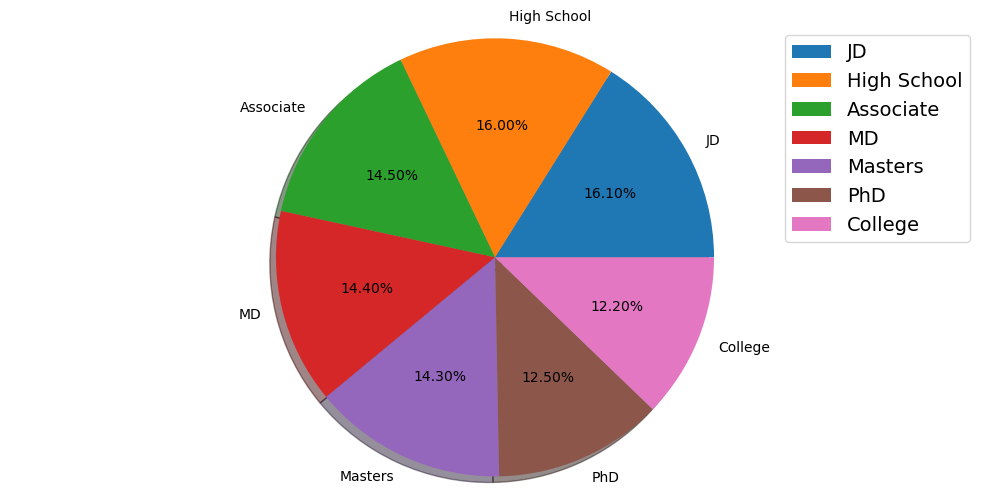

Pie plot for the column: insured_relationship


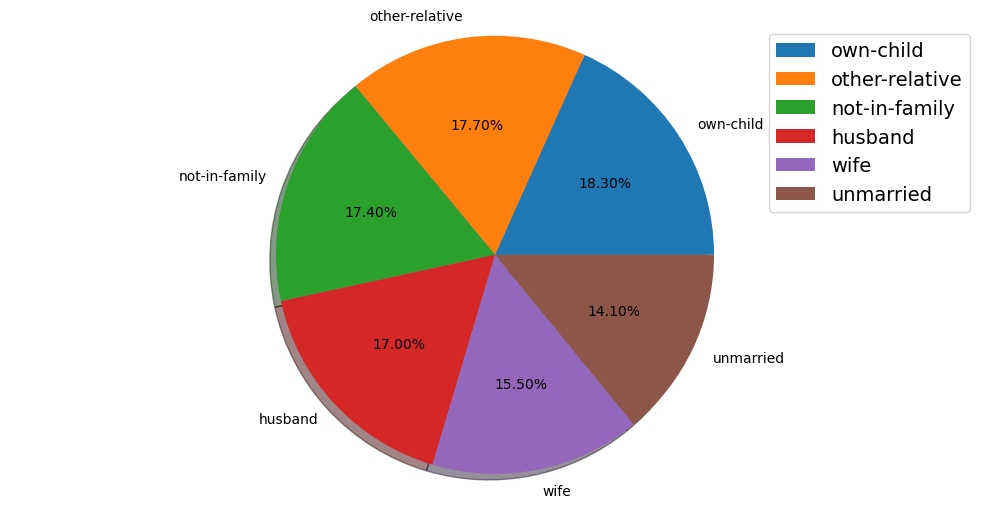

Pie plot for the column: incident_type


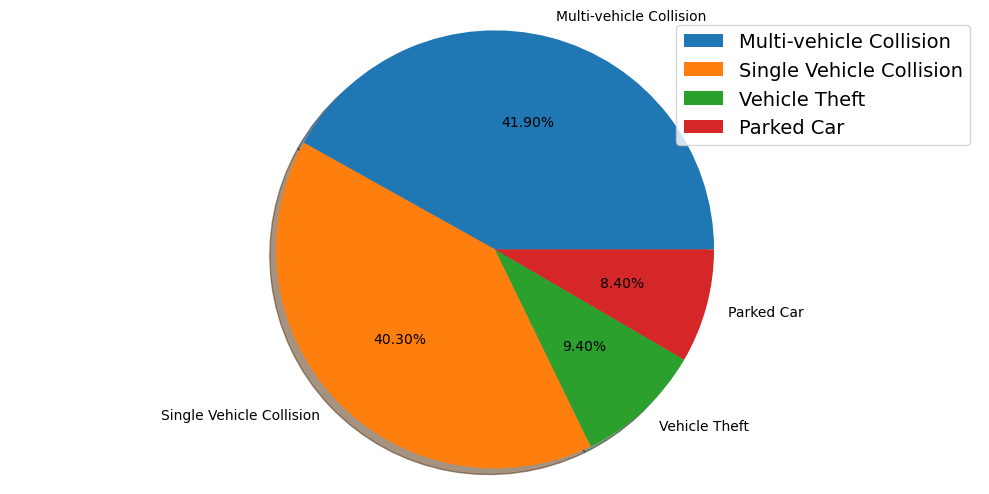

Pie plot for the column: collision_type


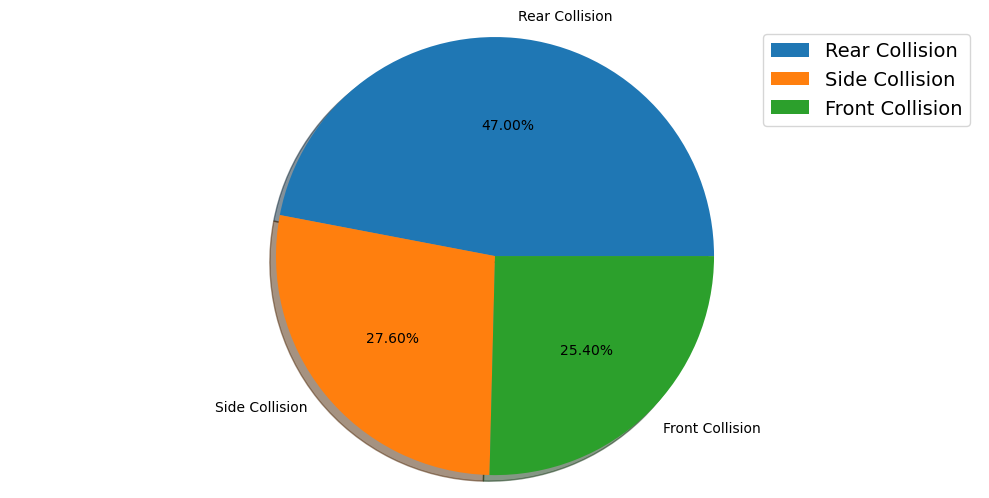

Pie plot for the column: property_damage


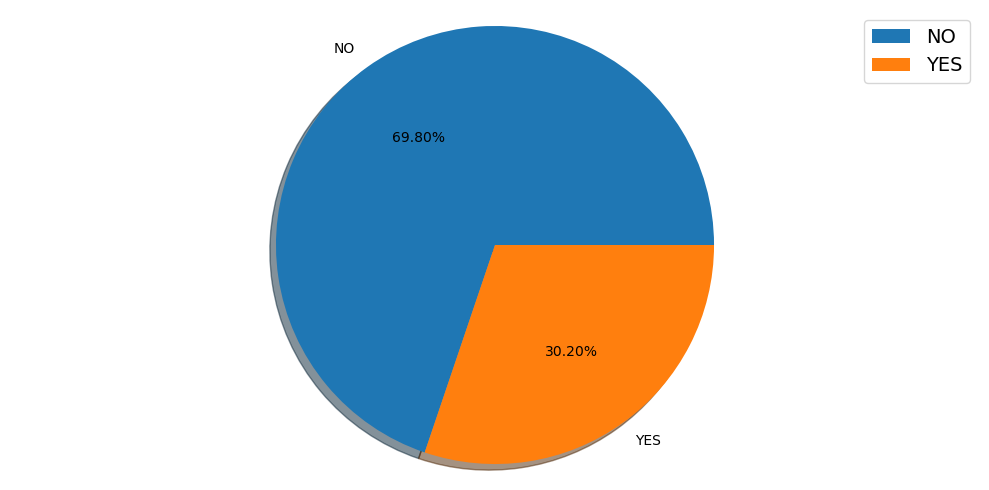

Pie plot for the column: police_report_available


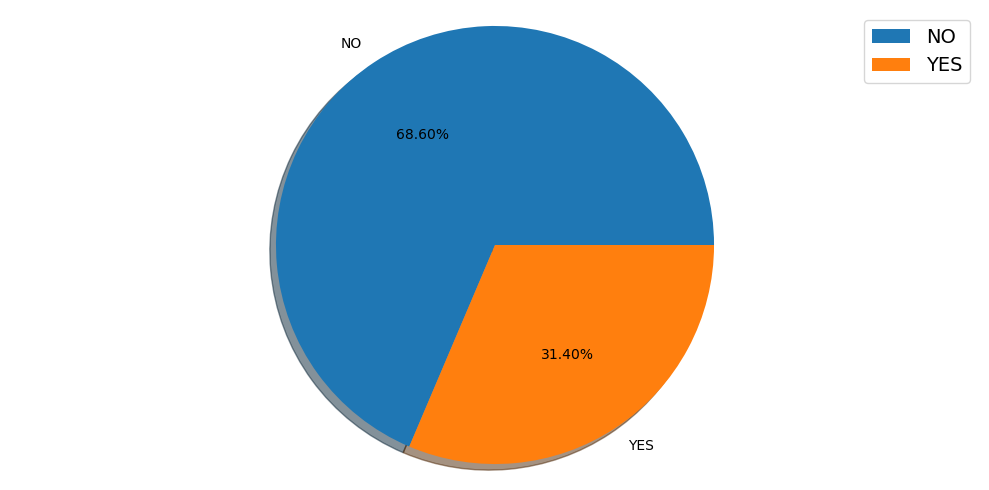

In [83]:
def generate_pie(i):
    plt.figure(figsize=(10,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

cols1 = ['policy_state', 'insured_sex', 'insured_education_level','insured_relationship', 'incident_type','collision_type','property_damage','police_report_available']

plotnumber=1
for j in df[cols1]:
    print(f"Pie plot for the column:", j)
    generate_pie(df[j])

Above are the pie plots for some of the categorical columns and below are few observations

The types of the policies claimed by the customers are almost same but still the policy state type OH has bit high counts and the type IL has bit less count.

Both male and female have insurance but the count for Female is higher than Male counts.

The count is pretty much same for all the education level but still the people who have completed their college and PhD have less count compared to others. 

Similar to insured education, insured relationship is also almost equally distributed. 

Under the incident type, Multi-vehicle collision and Single Vehicle Collision have almost similar counts of around 41.9% and 40.3%. But the count is very less in Parked car and Vehicle Theft. 

The collision type has 3 different types . In this the count is high in Rear collision and the other two types have almost equal counts. As we observe the propert damage plot, around 69.8% of the people did not face any property damage while 30.2% of the people faced the property damage. About 68.6% of the people produced the police reports while 31.4% of the people didn't submit any police reports.

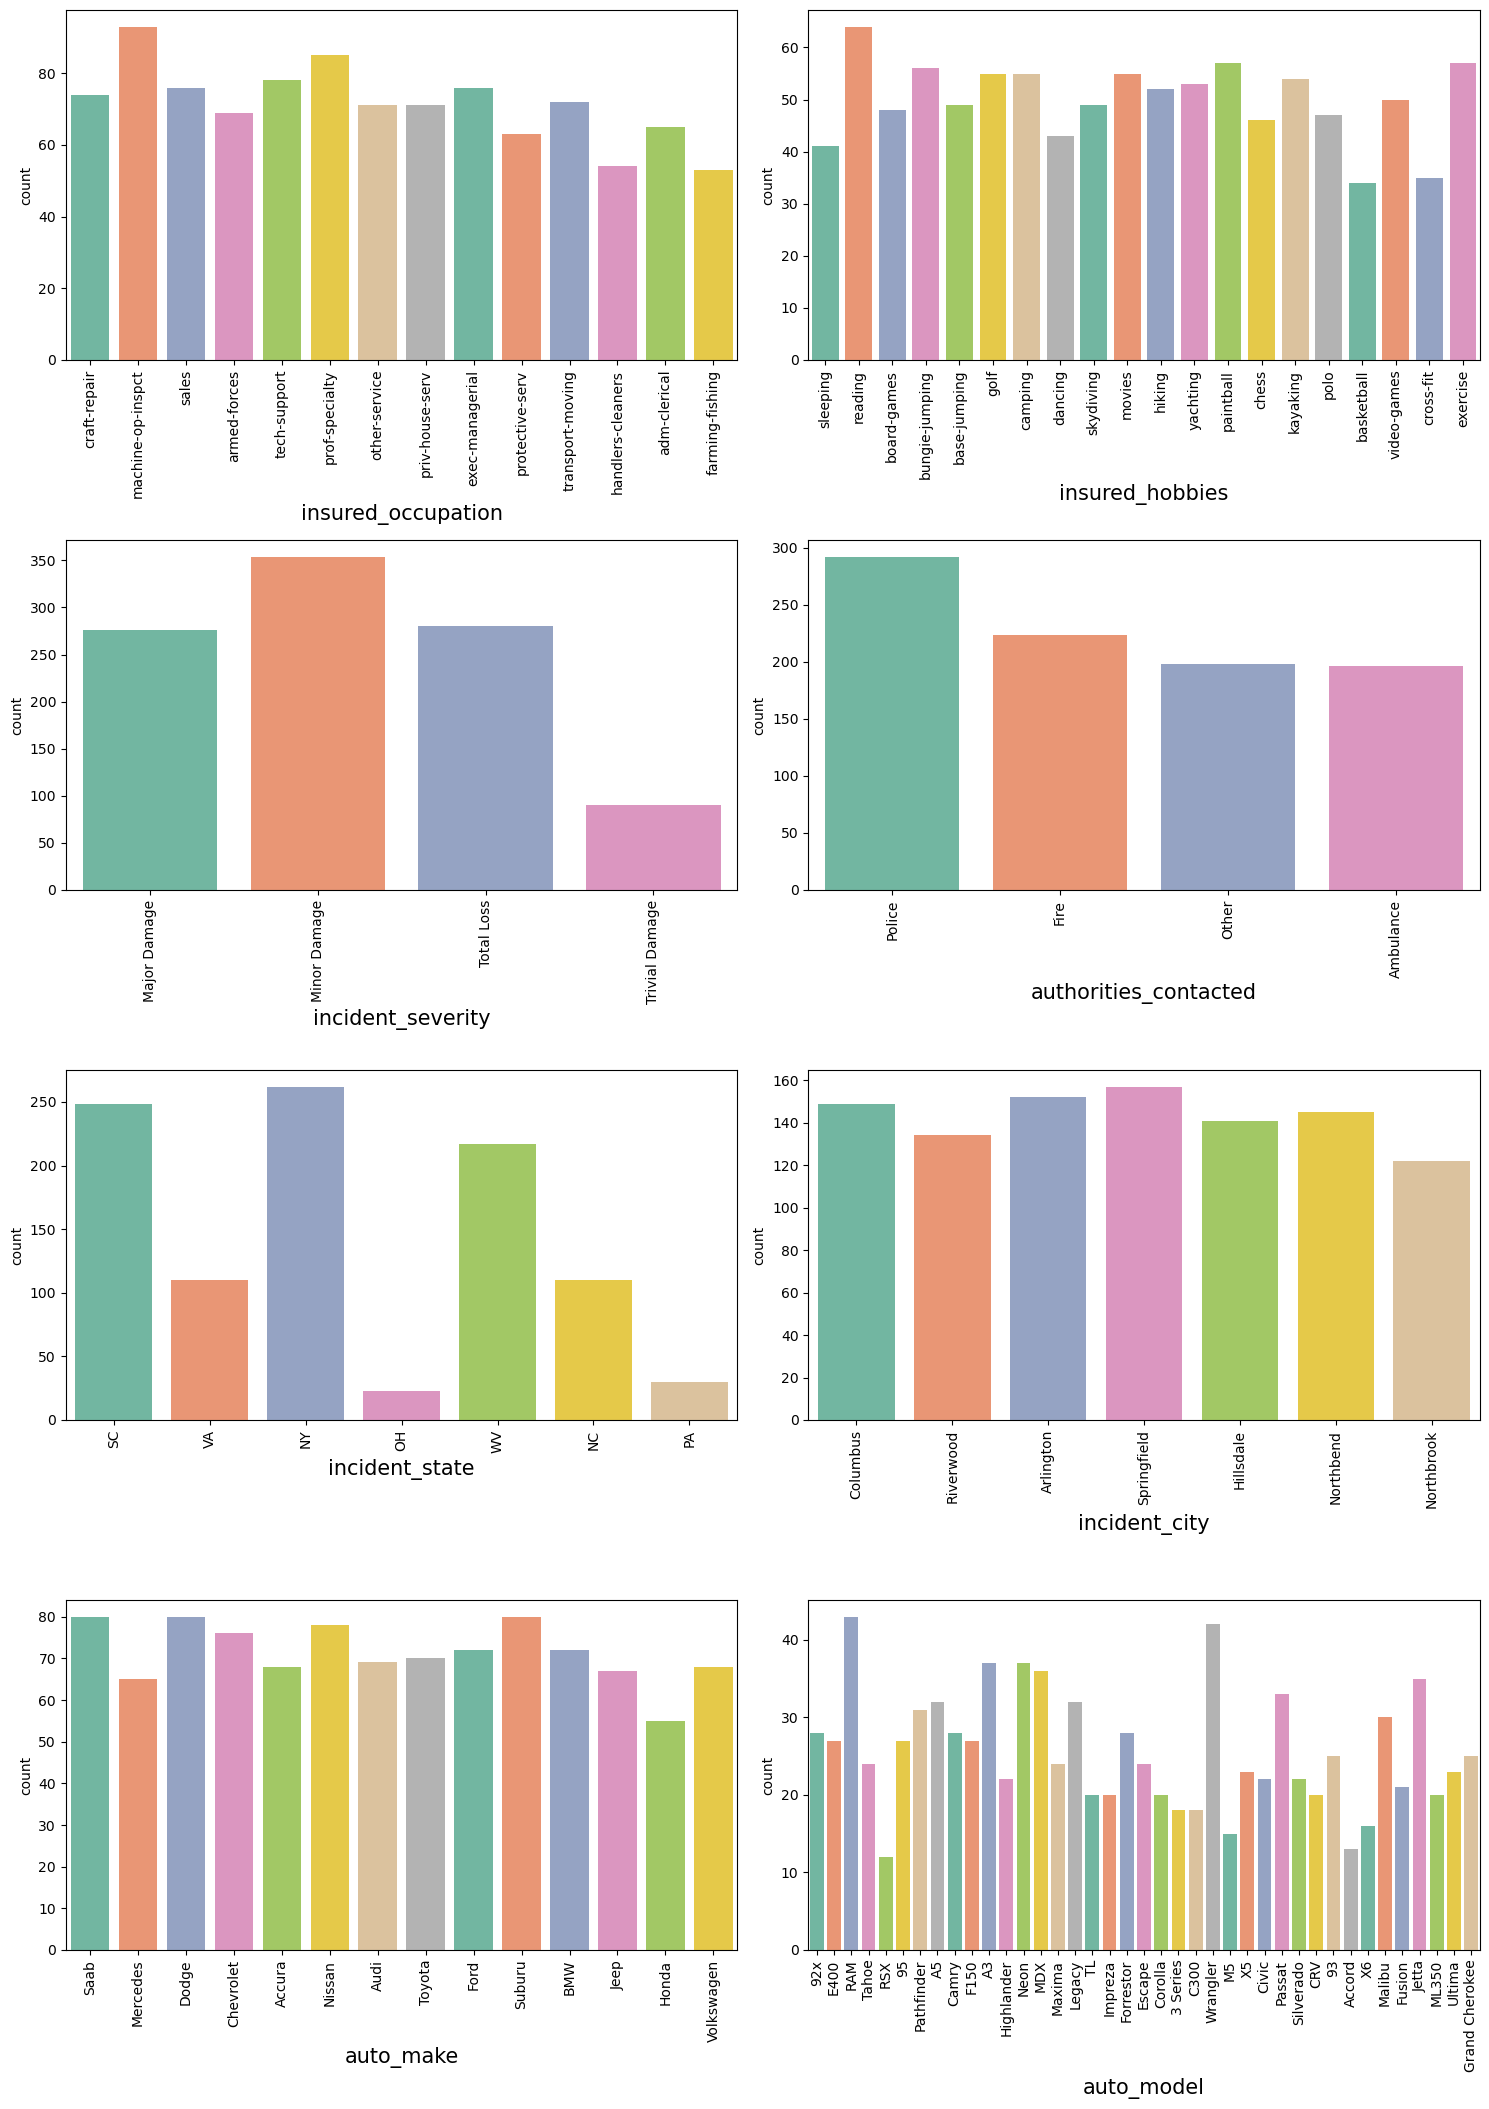

In [84]:
cols2 = ['insured_occupation', 'insured_hobbies', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city','auto_make', 'auto_model']

plt.figure(figsize=(15,25),facecolor='white')
plotnumber=1
for column in cols2:
    if plotnumber:
        ax=plt.subplot(5,2,plotnumber)
        sns.countplot(x= df[column],palette="Set2")
        plt.xticks(rotation=90)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

Above are the count plots for the remaining categorical columns and below are the observations

In the insured occupation category, the majority of the data is represented by machine operation inspectors, followed by professional specialties. The other insured occupations have nearly equal counts.

Regarding insured hobbies, reading has the highest representation, followed by exercise. The other categories have average counts. Incident severity shows a high count for minor damages, while trivial damage has a significantly lower count compared to others.

When accidents occur, authorities most frequently contact the police, with this category having the highest count. Fire has the second highest count, while Ambulance and Others have nearly equal counts. The None category has a much lower count compared to all others.

For the incident state, New York, South Carolina, and West Virginia have the highest counts. In terms of incident city, almost all columns have equal counts


# Check the Distribution of the dataset(numerical columns)

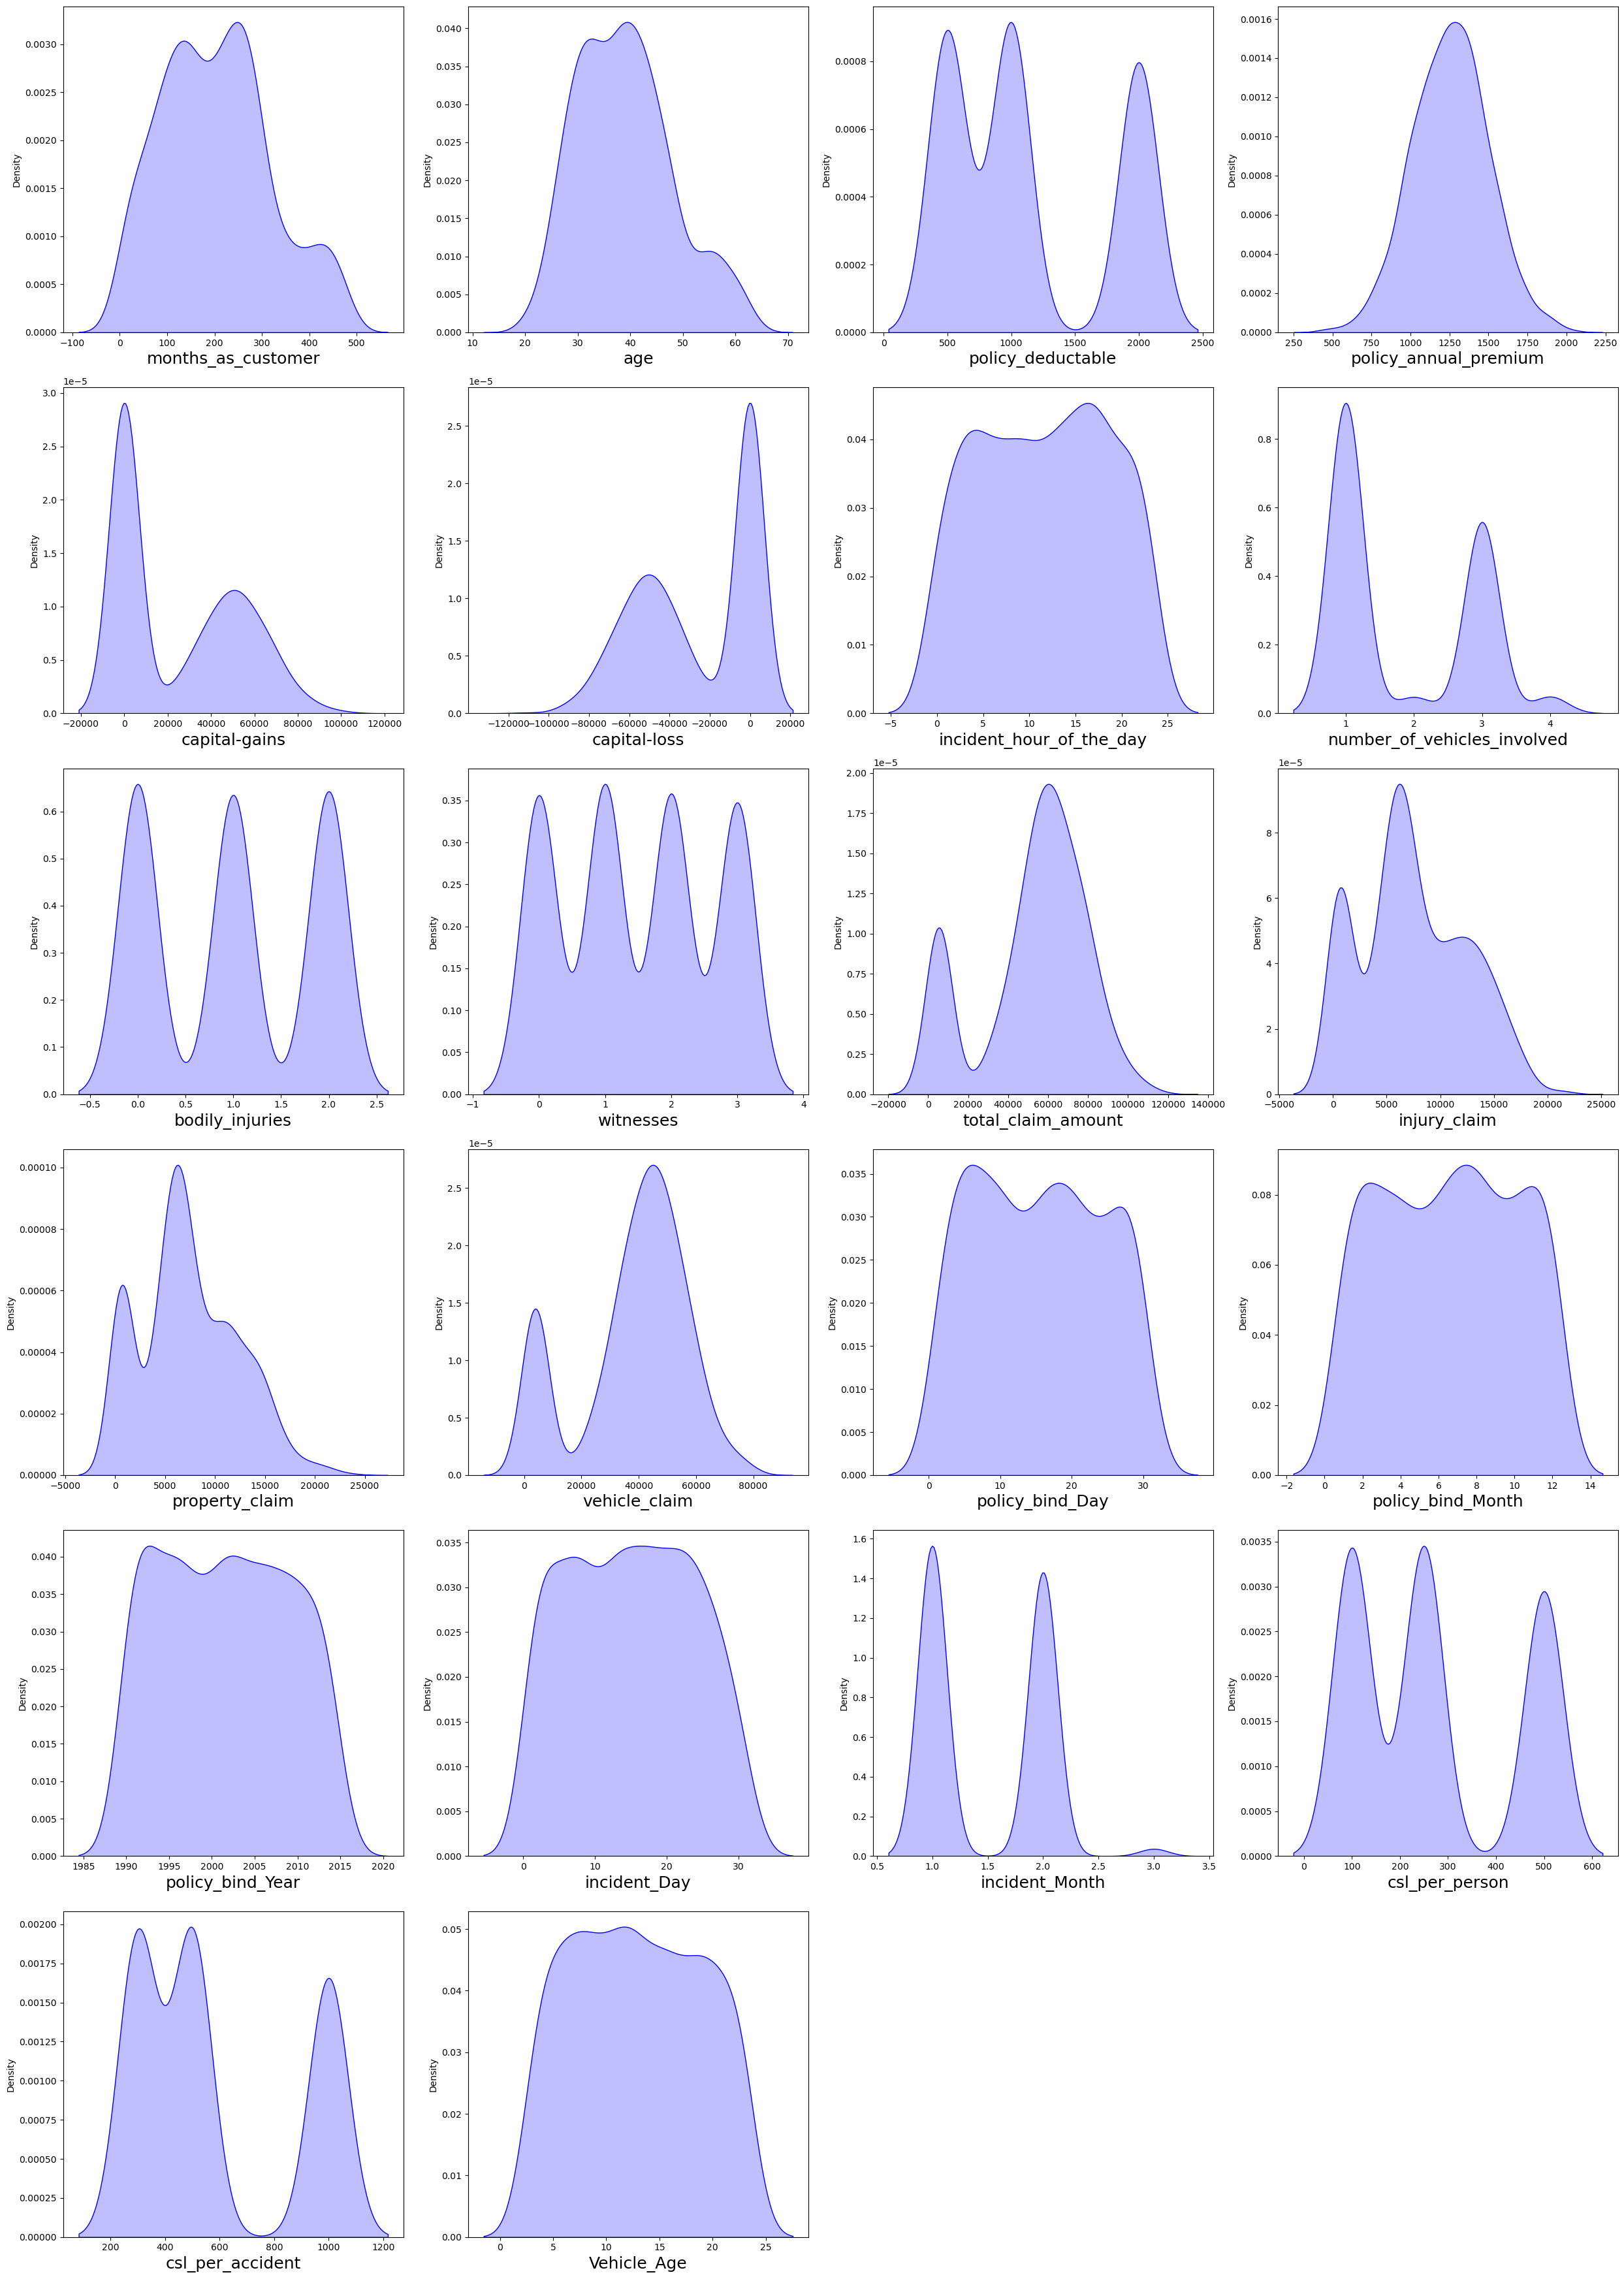

In [85]:
# Check how the data isdistriubted in each column
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="blue",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

Above are the distribution plots for all the numerical columns. From these plots, we can observe the following:

Most of the columns exhibit a normal distribution. However, some columns, such as capital gains and incident months, have a mean value greater than the median, indicating a left skew.

Conversely, the capital loss column is right-skewed, as the median is greater than the mean. We will address and correct these skews using appropriate methods later on

# Bivariate Analysis

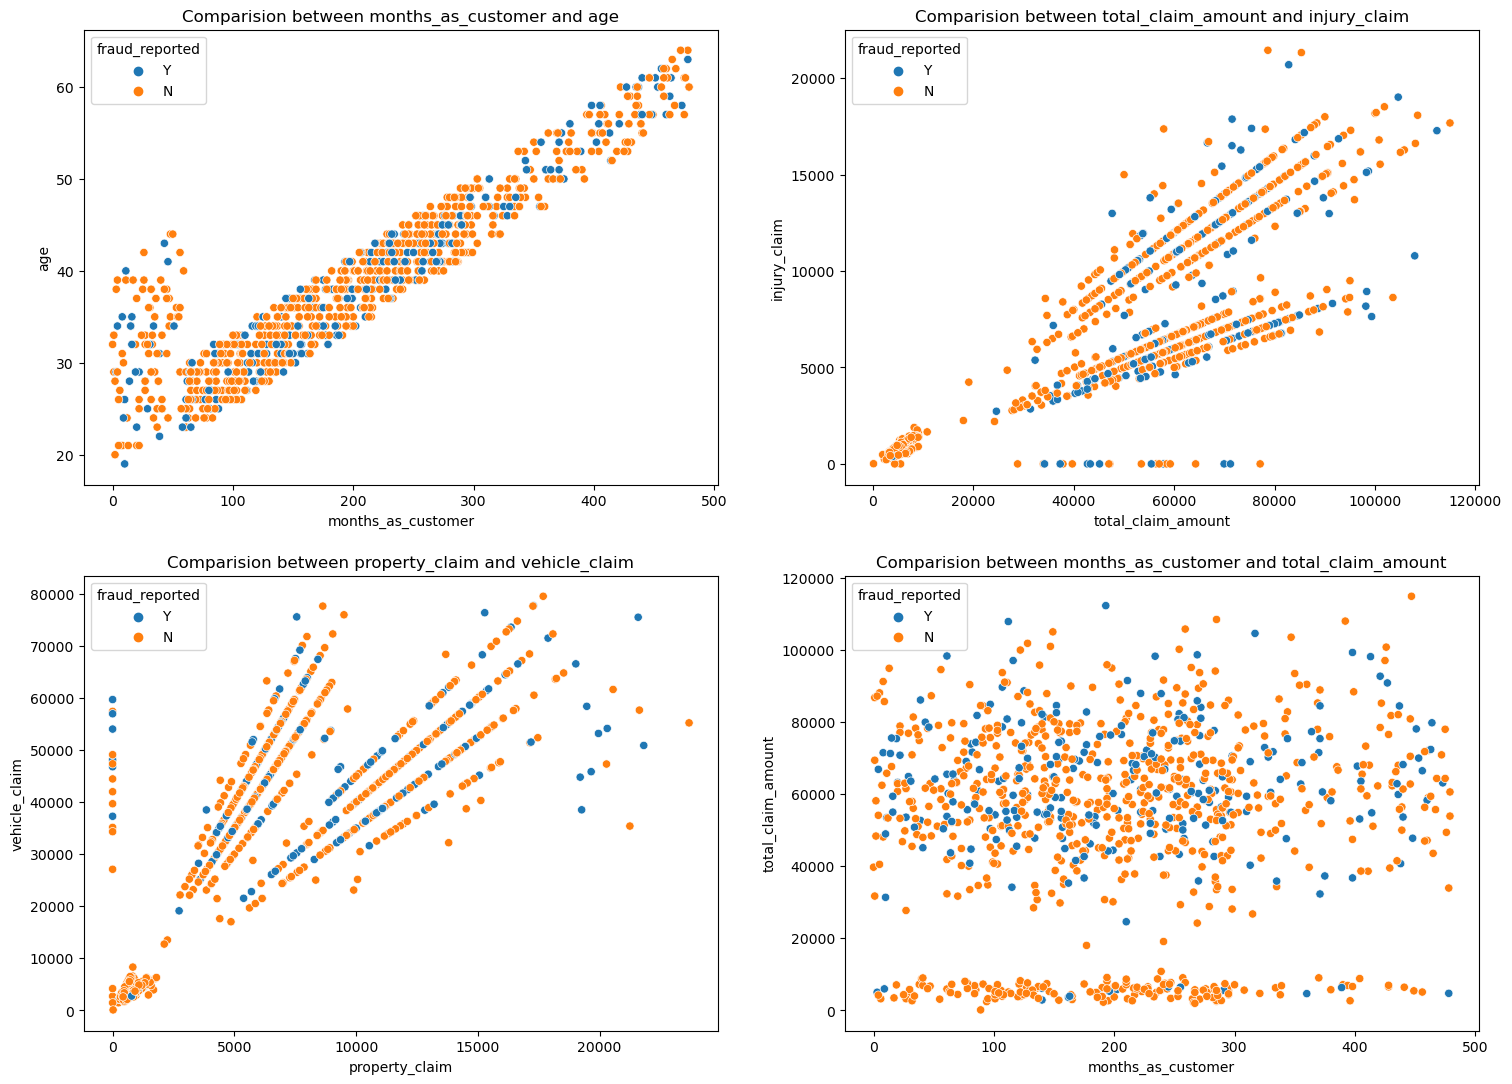

In [86]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparision between months_as_customer and age')
sns.scatterplot(x= df['months_as_customer'],y= df['age'],hue=df['fraud_reported']);

plt.subplot(2,2,2)
plt.title('Comparision between total_claim_amount and injury_claim')
sns.scatterplot(x= df['total_claim_amount'],y= df['injury_claim'],hue=df['fraud_reported']);

plt.subplot(2,2,3)
plt.title('Comparision between property_claim and vehicle_claim')
sns.scatterplot(x= df['property_claim'],y= df['vehicle_claim'],hue=df['fraud_reported']);

plt.subplot(2,2,4)
plt.title('Comparision between months_as_customer and total_claim_amount')
sns.scatterplot(x= df['months_as_customer'],y= df['total_claim_amount'],hue=df['fraud_reported']);

From the above scatter plot, we can observe the following:

There is a positive linear relationship between the age and month_as_customer columns. 
As age increases, the month_as_customer value also increases, with very few fraud cases reported in this scenario.

In the second graph, we see a positive linear relationship where, as the total claim amount increases, the injury claim amount also increases. 

The third plot shows a similar trend: as the property claim amount increases, the vehicle claim amount also increases. 

In the fourth plot, the data is scattered, indicating no significant relationship between the features

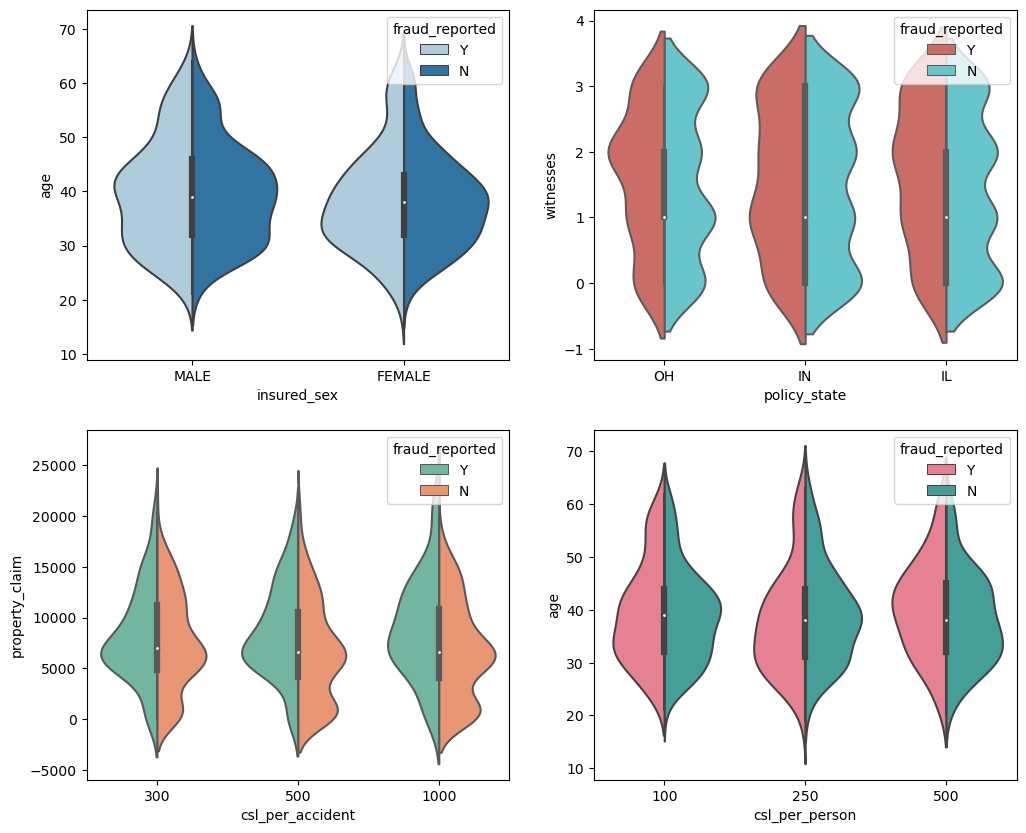

In [87]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Comparing insured_sex and age
sns.violinplot(x='insured_sex',y='age',ax=axes[0,0],data=df,palette="Paired",hue="fraud_reported",split=True)

# Comparing policy_state and witnesses
sns.violinplot(x='policy_state',y='witnesses',ax=axes[0,1],data=df,hue="fraud_reported",split=True,palette="hls")

# Comparing csl_per_accident and property_claim
sns.violinplot(x='csl_per_accident',y='property_claim',ax=axes[1,0],data=df,hue="fraud_reported",split=True,palette="Set2")

# Comparing csl_per_person and age
sns.violinplot(x='csl_per_person',y='age',ax=axes[1,1],data=df,hue="fraud_reported",split=True,palette="husl")
plt.show()

Fraud reports are high for both males and females aged between 30-45. Individuals who own policies in the state of "IN" have a high incidence of fraud reports. Those with CSL per accident insurance and property claims ranging from 5,000 to 15,000 also report high fraud. Additionally, individuals aged 30-45 with CSL per person insurance are facing fraudulent reports

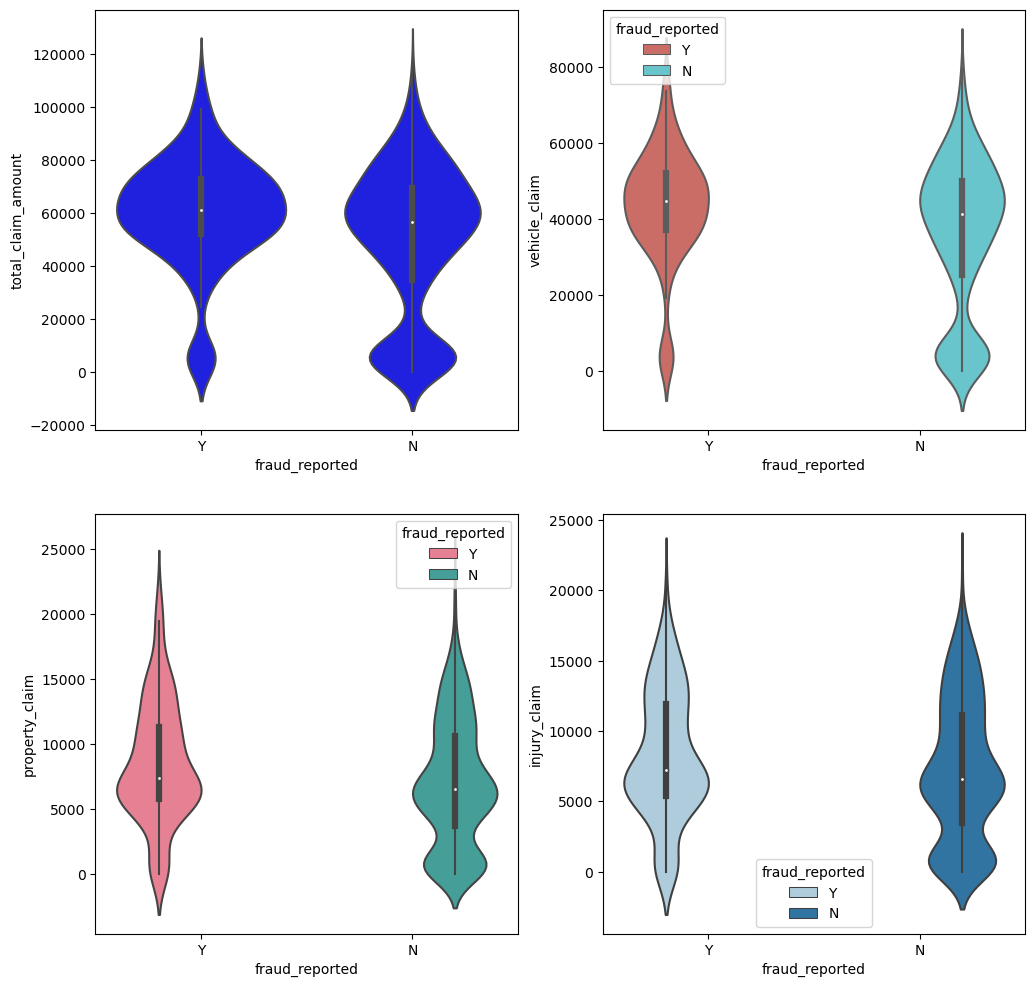

In [88]:
fig,axes=plt.subplots(2,2,figsize=(12,12))

# Comparing insured_sex and age
sns.violinplot(x='fraud_reported',y='total_claim_amount',ax=axes[0,0],data=df,color="b")

# Comparing policy_state and witnesses
sns.violinplot(x='fraud_reported',y='vehicle_claim',ax=axes[0,1],data=df,hue="fraud_reported",palette="hls")

# Comparing csl_per_accident and property_claim
sns.violinplot(x='fraud_reported',y='property_claim',ax=axes[1,0],data=df,hue="fraud_reported",palette="husl")

# Comparing csl_per_person and age
sns.violinplot(x='fraud_reported',y='injury_claim',ax=axes[1,1],data=df,hue="fraud_reported",palette="Paired")
plt.show()

Most fraud reports are found when the total claimed amount is between 50,000 and 70,000. Fraud reports are also high when the claimed vehicle value is between 37,000 and 57,000. Additionally, fraud reports are frequent when the property claimed is between 5,200 and 8,500. Most fraud is reported when injury claims are between 5,000 and 8,000

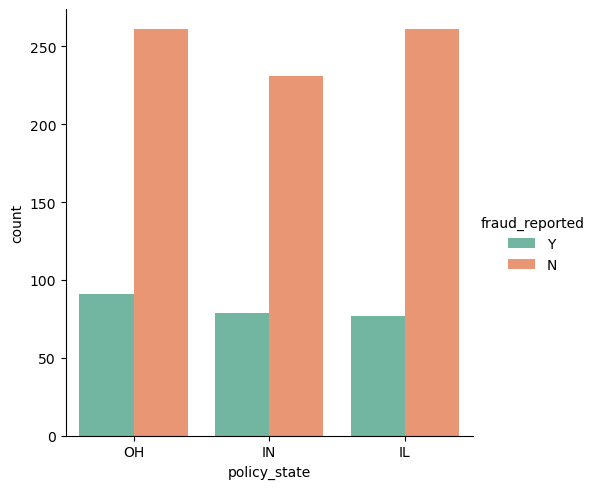

In [89]:
# Comparing policy_state and fraud_reported
sns.catplot(x = 'policy_state', kind='count', data = df, hue='fraud_reported', palette="Set2")
plt.show()

Fraud report is bit high in the "OH" policy state.

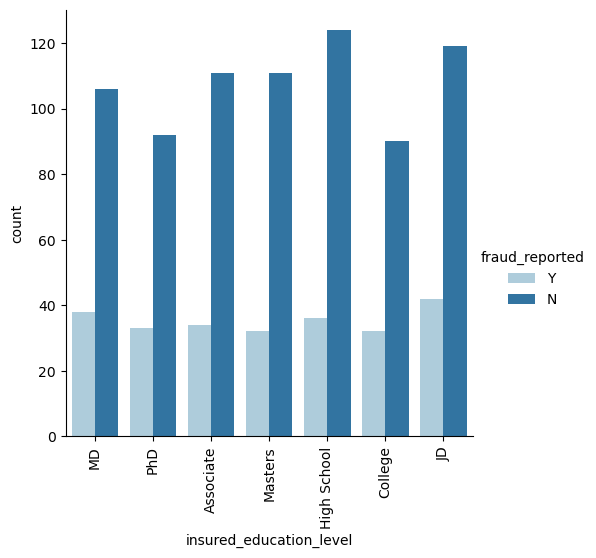

In [90]:
# Comparing insured_education_level and fraud_reported

sns.catplot(x= 'insured_education_level',kind='count',data=df,hue='fraud_reported',palette="Paired")
plt.xticks(rotation=90)
plt.show()

The fraudulent level is very less for the people who have high school education and the people who have completed their "JD" education have high fraud report. The people who have high insured education are facing insurance fraudulent compared to the people with less insured education level.

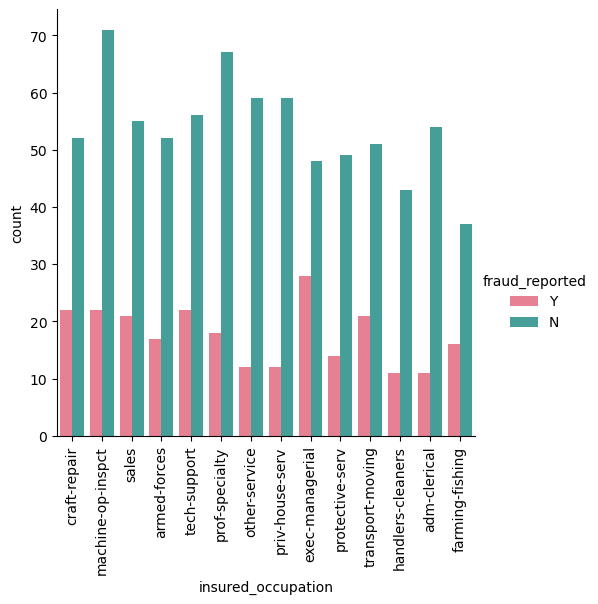

In [91]:
# Comparing insured_occupation and fraud_reported
sns.catplot(x= 'insured_occupation',kind='count',data=df,hue='fraud_reported',palette="husl")
plt.xticks(rotation=90)
plt.show()

People who are in the position exec-managerials have high fraud reports compared to others.

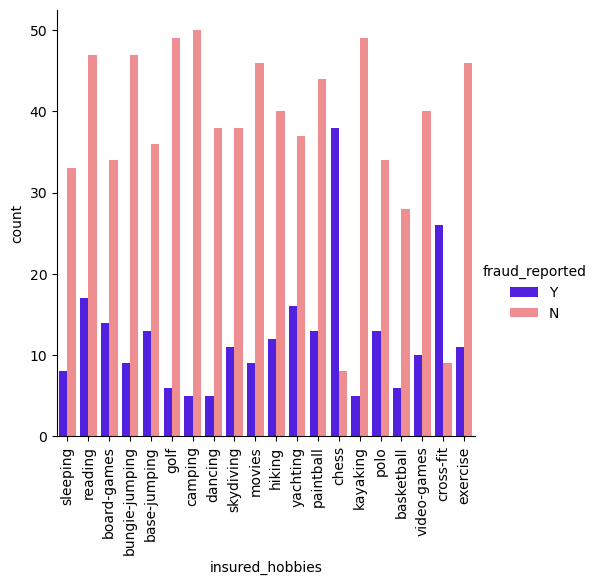

In [92]:
# Comparing insured_hobbies and fraud_reported
sns.catplot(x='insured_hobbies',kind='count',data=df,hue='fraud_reported',palette="gnuplot2")
plt.xticks(rotation=90)
plt.show()

The fraud report is high for the people who have the hobby of playing chess and cross fit.

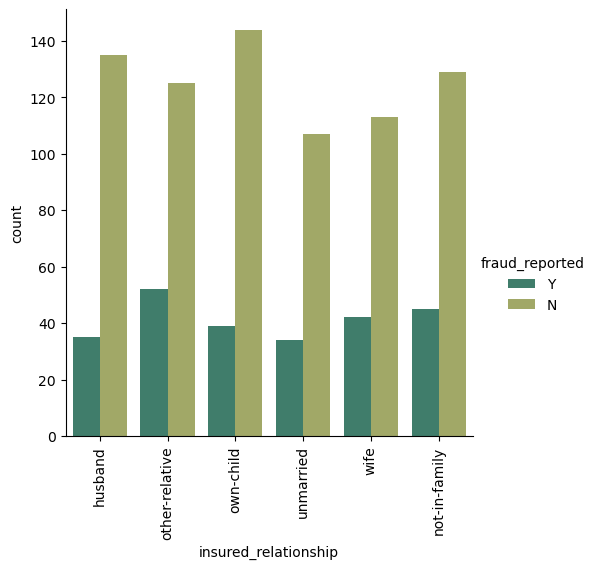

In [93]:
# Comparing insured_relationship and fraud_reported
sns.catplot(x='insured_relationship',kind='count',data=df,hue='fraud_reported',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

The fraud report is high for the customers who have other relative and it is very less for unmarried people.

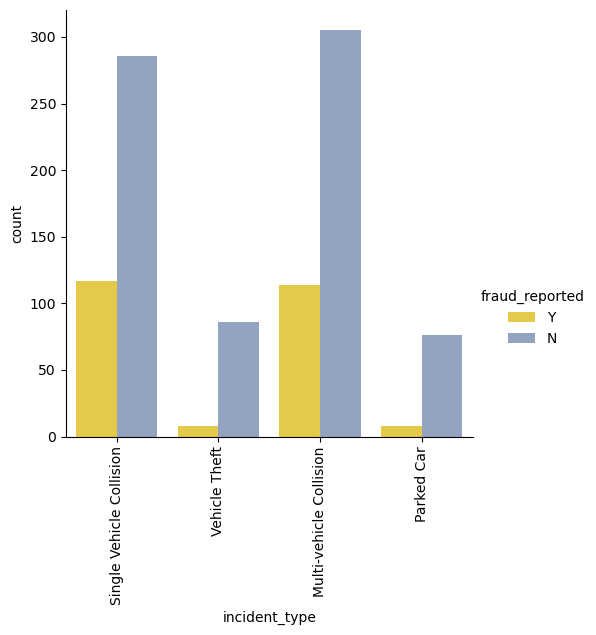

In [94]:
# Comparing incident_type and fraud_reported
sns.catplot(x='incident_type',kind='count',data=df,hue='fraud_reported',palette="Set2_r")
plt.xticks(rotation=90)
plt.show()

In Multivehicle collission and single vehicle collision, the fraud report is very high compared to others.

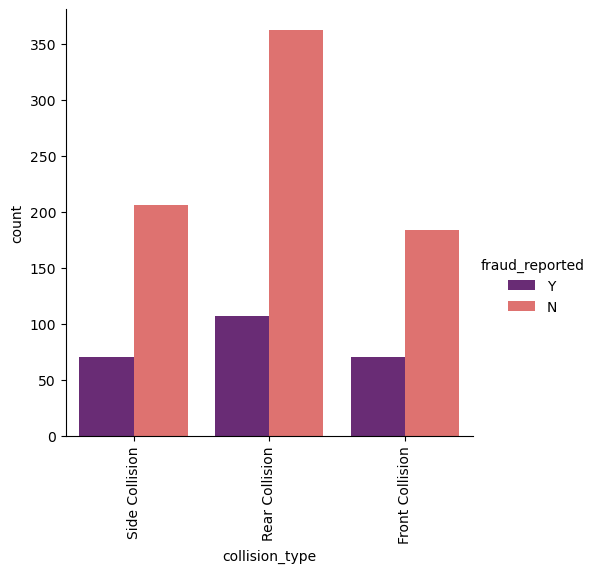

In [95]:
# Comparing collision_type and fraud_reported
sns.catplot(x='collision_type',kind='count',data=df,hue='fraud_reported',palette="magma")
plt.xticks(rotation=90)
plt.show()

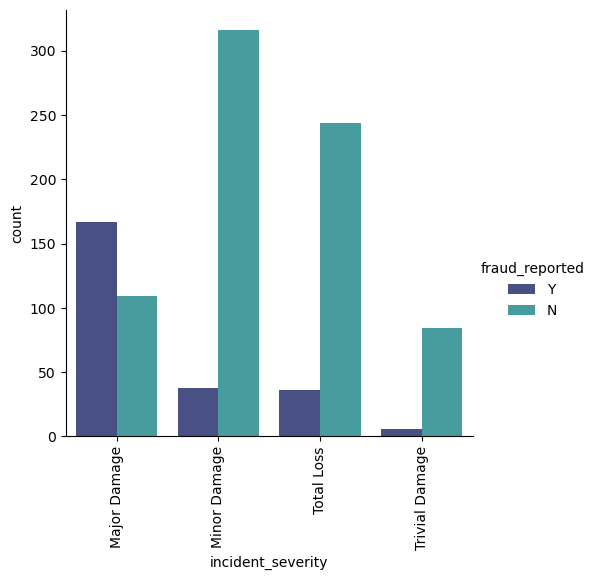

In [96]:
# Comparing incident_severity and fraud_reported
sns.catplot(x='incident_severity',kind='count',data=df,hue='fraud_reported',palette="mako")
plt.xticks(rotation=90)
plt.show()

The fraud report is high in Major damage incident severity and for Trivial Damage the report is less compared to others.

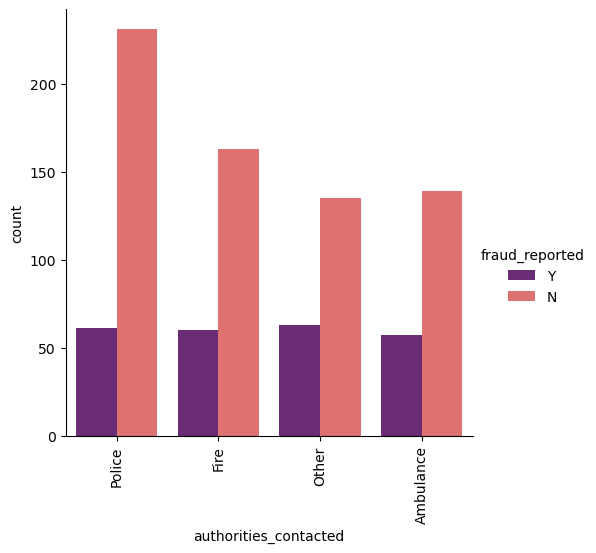

In [97]:
# Comparing authorities_contacted and fraud_reported
sns.catplot(x='authorities_contacted',kind='count',data=df,hue='fraud_reported',palette="magma")
plt.xticks(rotation=90)
plt.show()

The police contacted cases are very high and the fraud report is in equal for all the authorities except None.

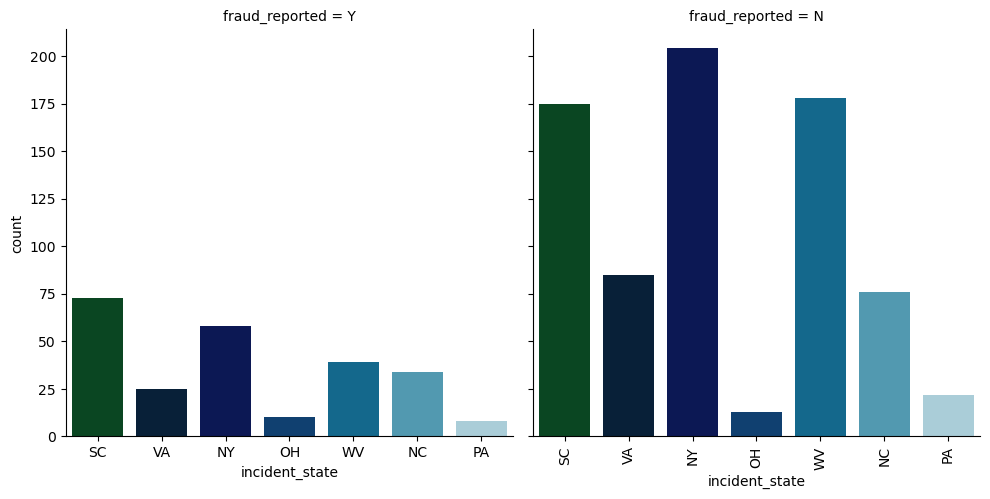

In [98]:
# Comparing incident_state and fraud_reported
sns.catplot(x='incident_state',kind='count',data=df,col='fraud_reported',palette="ocean")
plt.xticks(rotation=90)
plt.show()

The state SC has high fraud reports compared to other states.

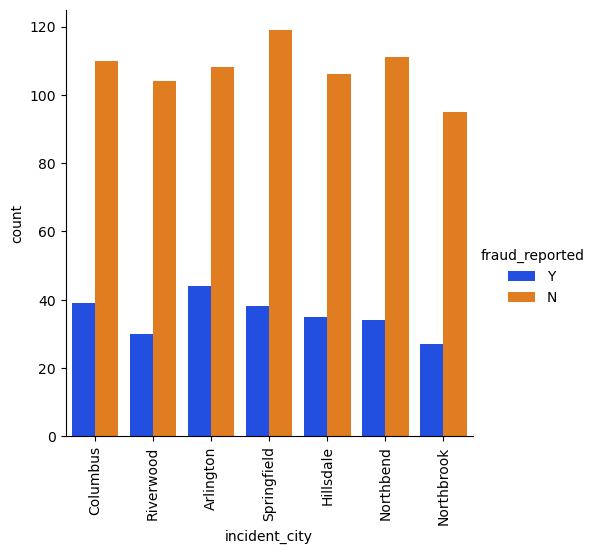

In [99]:
# Comparing incident_city and fraud_reported
sns.catplot(x='incident_city',kind='count',data=df,hue='fraud_reported',palette="bright")
plt.xticks(rotation=90)
plt.show()

Cities Riverwood and Northbrook have very less fraud reports compared to others.

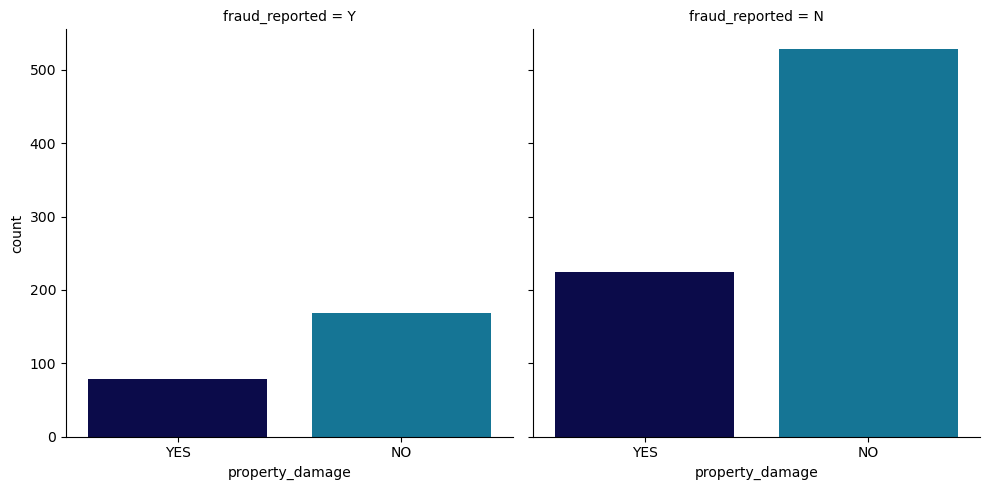

In [100]:
# Comparing property_damage and fraud_reported
sns.catplot(x='property_damage',kind='count',data=df,col='fraud_reported',palette="ocean")
plt.show()

Customers who do not have any property damage case they have high fraud reports.

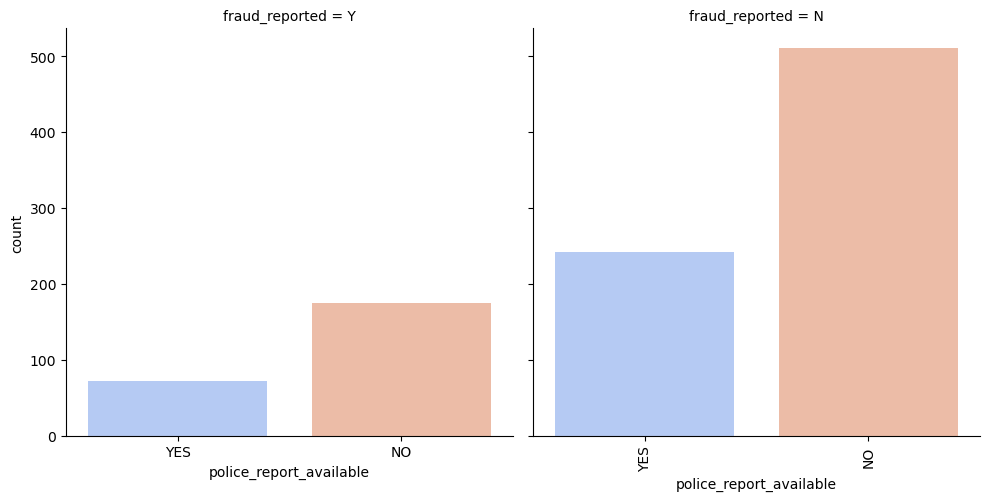

In [101]:
# Comparing police_report_available and fraud_reported
sns.catplot(x='police_report_available',kind='count',data=df,col='fraud_reported',palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

If the police report is unavailable then the fraud report is very high.

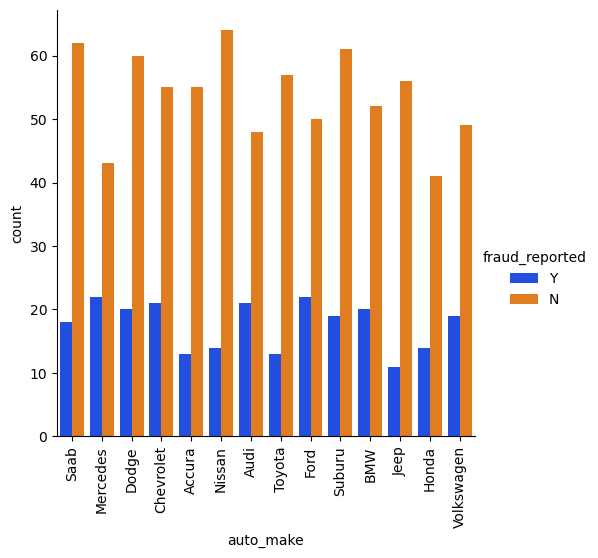

In [102]:
# Compare auto_make and fraud_reported
sns.catplot(x='auto_make',kind='count',data=df,hue='fraud_reported',palette="bright")
plt.xticks(rotation=90)
plt.show()

In all the auto make cases the fraud report is almost same.

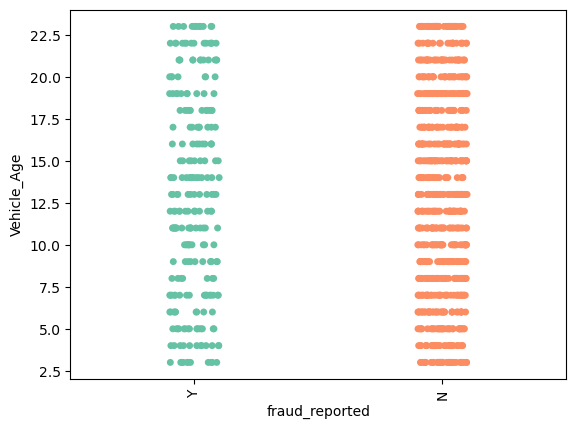

In [104]:
# Compare Vehicle_Age and fraud_reported
sns.stripplot(y='Vehicle_Age',x='fraud_reported',data=df,palette="Set2")
plt.xticks(rotation=90)
plt.show()

There is no significant difference between the features.

# Multivariate Analysis

In [ ]:
sns.pairplot(df,hue="fraud_reported",diag_kind="hist", palette="husl")
plt.show()

In the pairplot we can see the relation between each variable with respect to other variables

# Identifying the outliers

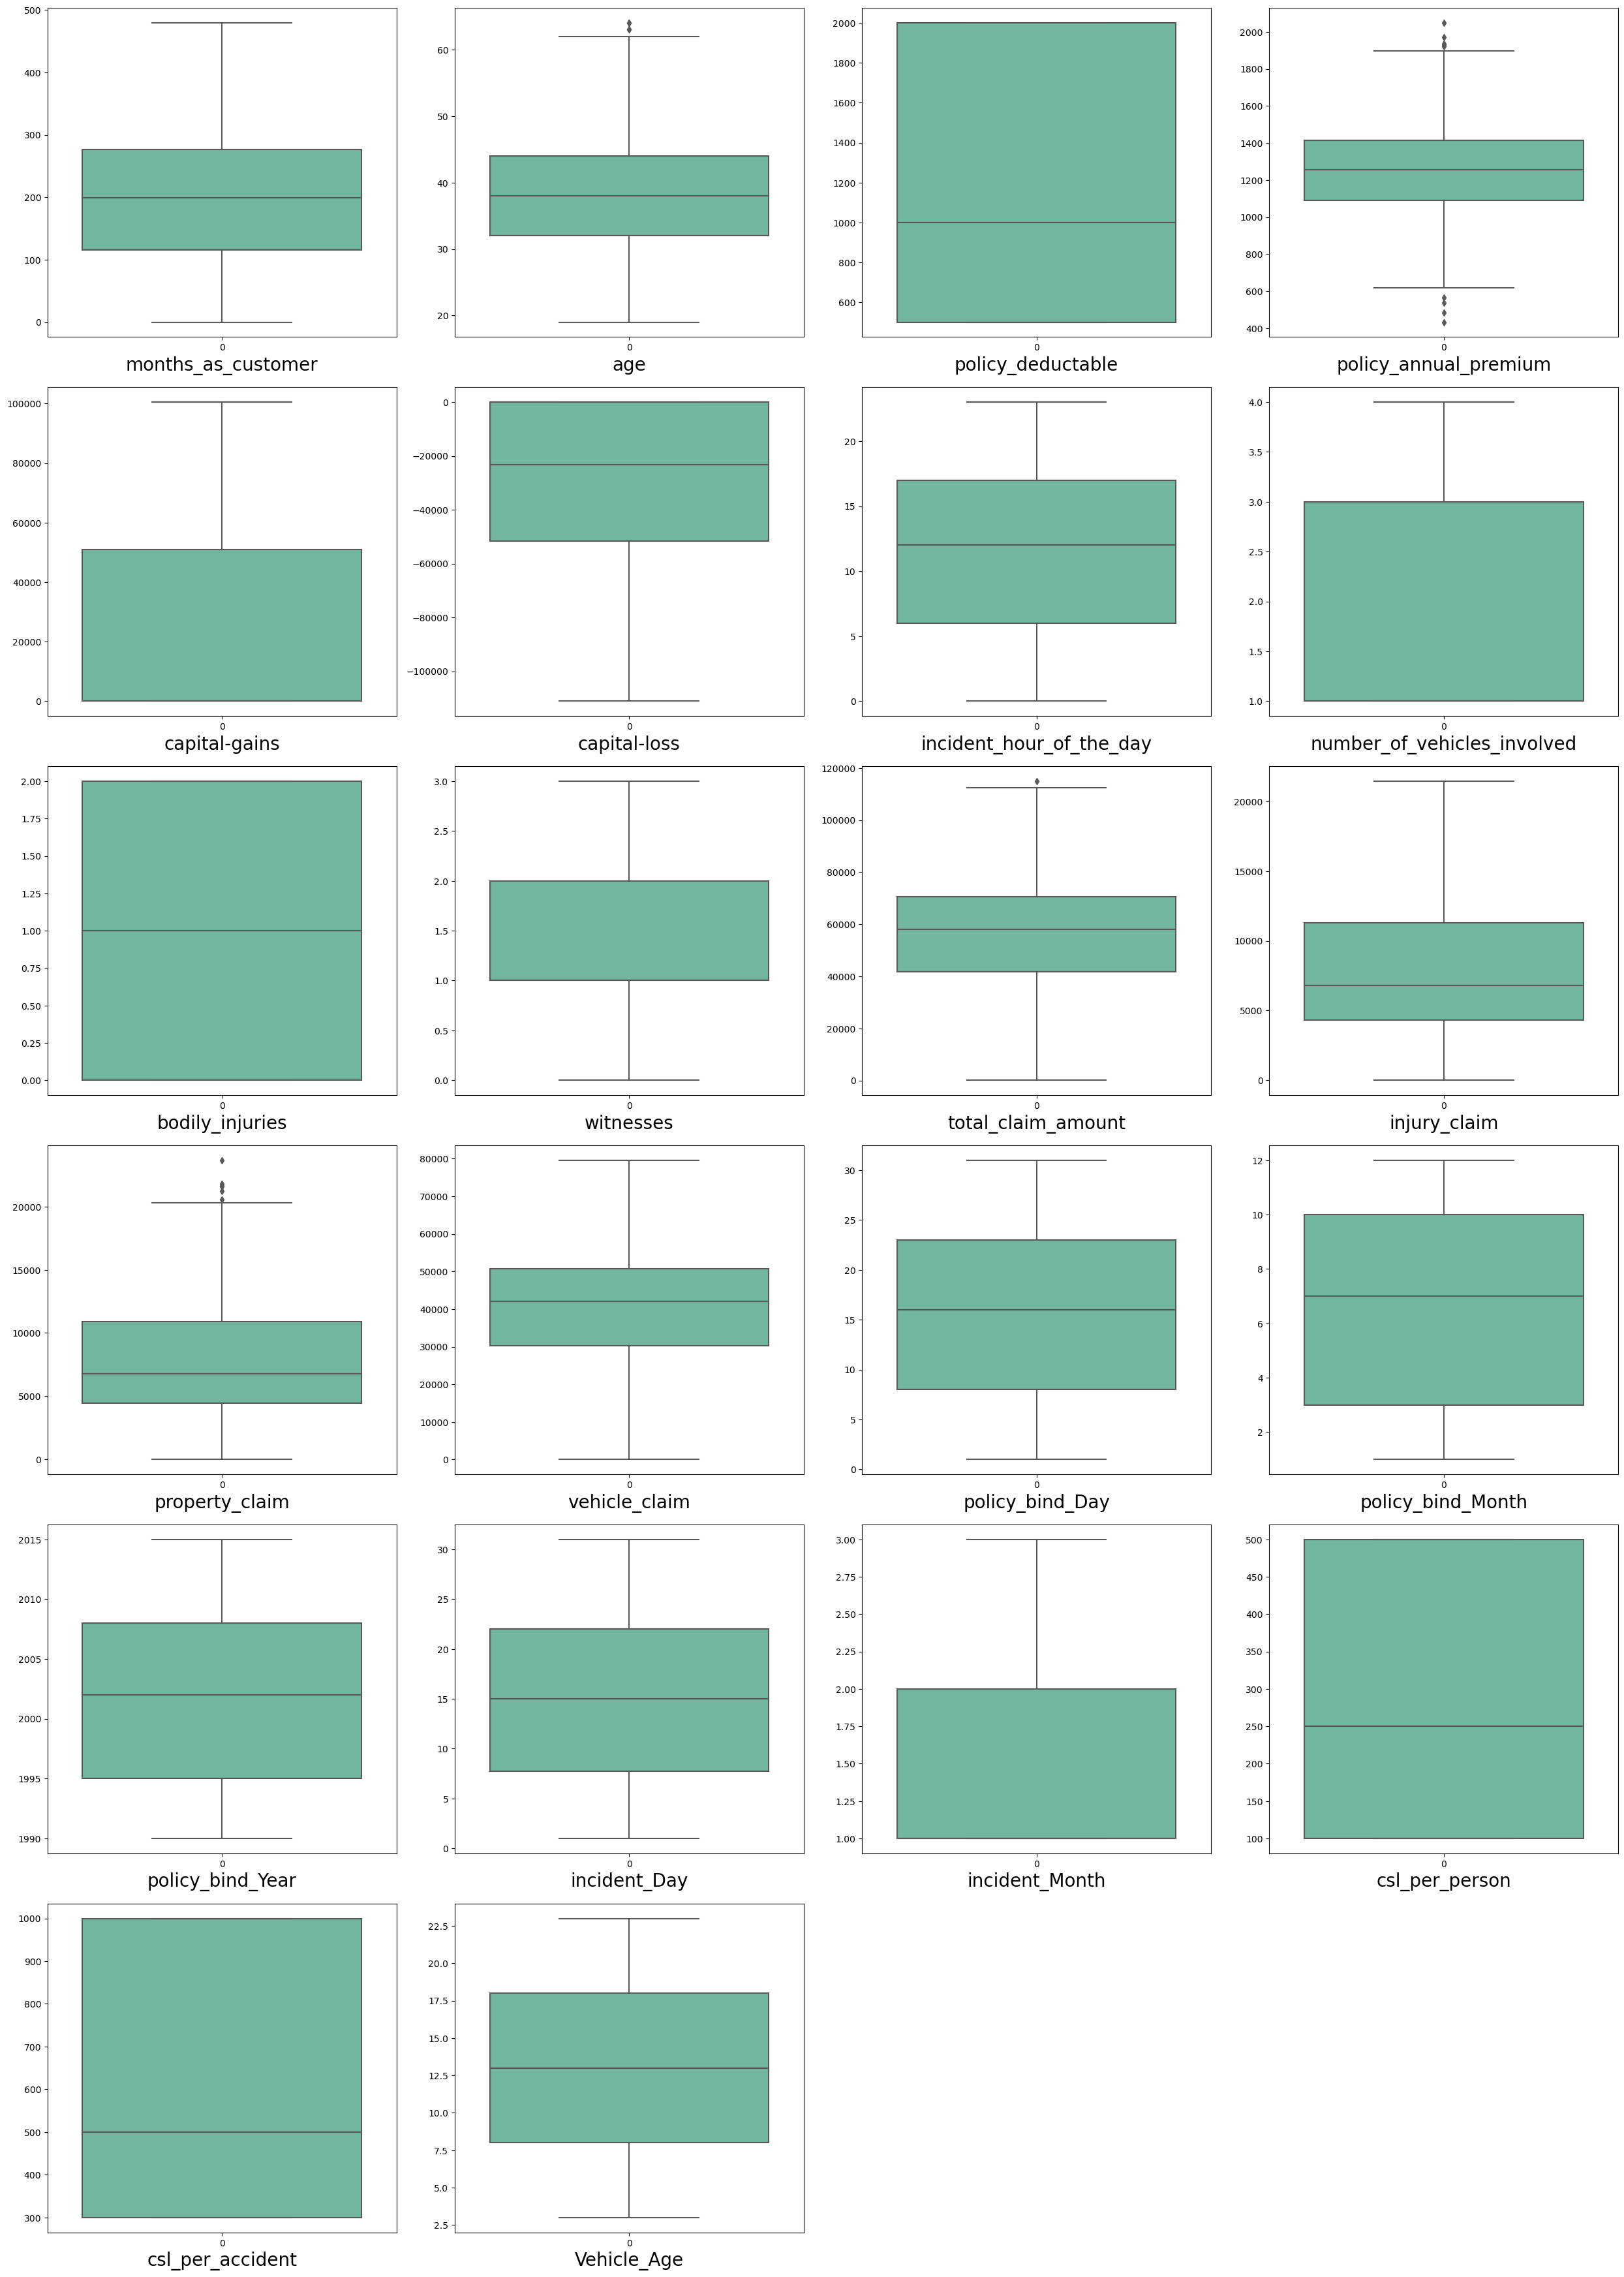

In [105]:
# Check the outliers by ploting box plot

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],palette="Set2")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can find the outliers in the following columns:

age policy_annual_premium , total_claim_amount , property_claim and incident_month.

These are the numerical columns which contains outliers. Remove the outliers in these columns using Zscore method.

# Remove outliers

In [106]:
# Feature containing outliers
features = df[['age','policy_annual_premium','total_claim_amount','property_claim','incident_Month']]

z=np.abs(zscore(features))

z

,age,policy_annual_premium,total_claim_amount,property_claim,incident_Month
0,0.990836,0.616705,0.714257,1.165505,0.947587
1,0.334073,0.242521,1.807312,1.372696,0.947587
2,1.088913,0.642233,0.686362,0.736072,0.962871
3,0.224613,0.652886,0.403135,0.219722,0.947587
4,0.552994,1.341980,1.753121,1.399654,0.962871
...,...,...,...,...,...
995,0.103769,0.222884,1.305049,0.273817,0.962871
996,0.224613,0.739141,2.111466,2.214794,0.947587
997,0.541611,0.520739,0.558507,0.020826,0.947587
998,2.523284,0.411866,0.219110,0.451976,0.962871


In [107]:
# Create new dataframe after removing the outliers whose Zscore is less than 3.
new_df = df[(z<3).all(axis=1)] 
new_df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,csl_per_person,csl_per_accident,Vehicle_Age
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,92x,Y,17,10,2014,25,1,250,500,14
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,E400,Y,27,6,2006,21,1,250,500,11
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,RAM,N,6,9,2000,22,2,100,300,11
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,Tahoe,Y,25,5,1990,10,1,250,500,4
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,RSX,N,6,6,2014,17,2,500,1000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,FEMALE,Masters,craft-repair,paintball,unmarried,...,Accord,N,16,7,1991,22,2,500,1000,12
996,285,41,IL,1000,1436.79,FEMALE,PhD,prof-specialty,sleeping,wife,...,Passat,N,5,1,2014,24,1,100,300,3
997,130,34,OH,500,1383.49,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,...,Impreza,N,17,2,2003,23,1,250,500,22
998,458,62,IL,2000,1356.92,MALE,Associate,handlers-cleaners,base-jumping,wife,...,A5,N,18,11,2011,26,2,500,1000,20


# Check skewness in the data

In [108]:
# Check the skewness
new_df.skew().sort_values()

TypeError: could not convert string to float: 'OH'

The following features contains the skewness

total_claim_amount vehicle_claim incident_Month csl_per_accident

# Remove Skewness using yeo-johnson method

In [ ]:
# Remove skewness using yeo-johnson method to get better prediction

skew = ["total_claim_amount","vehicle_claim","incident_Month","csl_per_accident"]

transf = PowerTransformer(method='yeo-johnson')

In [109]:
new_df[skew] = transf.fit_transform(new_df[skew].values)
new_df[skew].head()

NameError: name 'transf' is not defined

In [110]:
# Checking skewness after using yeo-johnson ethod
new_df[skew].skew().sort_values()

NameError: name 'skew' is not defined

In [111]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_df[column],color='green',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

NameError: name 'skew' is not defined

<Figure size 1000x1000 with 0 Axes>

## Encoding the categorical columns using Label Encoding

In [112]:
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [113]:
new_df[categorical_col].head()

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2,1,4,2,17,0,2,2,0,3,4,1,1,1,10,1,1
1,1,1,4,6,15,2,3,1,1,3,5,5,0,0,8,12,1
2,2,0,6,11,2,3,0,1,1,3,1,1,0,0,4,30,0
3,0,0,6,1,2,4,2,0,0,3,2,0,0,0,3,34,1
4,0,1,0,11,2,4,3,1,1,4,1,0,0,0,0,31,0


The categorical columns have been converted into numerical columns by using label encoding.

## Correlation between the target variable and independent variables using HEAT map

In [114]:
# Check the correlation between features and the target
cor = new_df.corr()
cor

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,csl_per_person,csl_per_accident,Vehicle_Age
months_as_customer,1.000000,0.922092,0.000118,0.023512,-0.003378,0.059002,-0.000848,0.005365,-0.092575,0.071097,...,0.002908,0.020966,0.058051,-0.004430,-0.046010,-0.004740,-0.047126,-0.022063,-0.021145,-0.001287
age,0.922092,1.000000,-0.015182,0.026772,0.005890,0.072900,0.001485,0.014030,-0.080587,0.075940,...,0.016258,0.012408,0.058530,0.005683,-0.035505,0.000843,-0.040625,-0.012844,-0.012967,-0.003268
policy_state,0.000118,-0.015182,1.000000,0.010740,0.014475,-0.019294,-0.032551,-0.031016,-0.040215,-0.018855,...,-0.024513,0.028864,0.011078,0.044056,-0.005709,0.024963,0.017391,-0.005866,-0.009652,-0.002323
policy_deductable,0.023512,0.026772,0.010740,1.000000,-0.008445,-0.011671,0.014571,-0.050024,0.005134,-0.021763,...,-0.003597,0.015833,0.001948,-0.026390,-0.048465,-0.023898,-0.028903,0.006634,0.006888,-0.027497
policy_annual_premium,-0.003378,0.005890,0.014475,-0.008445,1.000000,0.041830,-0.021475,0.030963,-0.014376,0.006474,...,-0.034998,-0.010174,-0.040755,-0.003040,0.001650,0.027156,-0.051793,0.028569,0.026591,0.040439
insured_sex,0.059002,0.072900,-0.019294,-0.011671,0.041830,1.000000,0.007473,-0.009257,-0.019600,0.004104,...,-0.017679,0.032173,0.043745,-0.001689,-0.031981,0.002369,-0.027197,-0.019001,-0.026198,0.028638
insured_education_level,-0.000848,0.001485,-0.032551,0.014571,-0.021475,0.007473,1.000000,-0.021502,0.022806,-0.021595,...,0.050878,0.011520,0.043706,-0.080717,0.017801,-0.035547,-0.052709,0.011093,0.011448,-0.045094
insured_occupation,0.005365,0.014030,-0.031016,-0.050024,0.030963,-0.009257,-0.021502,1.000000,-0.009818,-0.008141,...,0.020878,0.003335,0.011567,-0.013004,-0.025282,-0.019689,-0.012972,0.018978,0.018298,0.004827
insured_hobbies,-0.092575,-0.080587,-0.040215,0.005134,-0.014376,-0.019600,0.022806,-0.009818,1.000000,-0.097837,...,0.031208,-0.047983,0.018190,0.020865,-0.013819,0.019566,-0.029051,-0.013322,-0.017263,0.015606
insured_relationship,0.071097,0.075940,-0.018855,-0.021763,0.006474,0.004104,-0.021595,-0.008141,-0.097837,1.000000,...,0.062286,0.017992,0.017164,0.018963,-0.006190,-0.083118,0.006079,-0.022125,-0.015054,0.026099


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

In [115]:
# Visualize the correlation matrix by plotting heat map.
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f', 
            annot_kws={'size':16}, cmap="plasma", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

ValueError: could not convert string to float: 'OH'

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between the features

The heatmap contains both positive and negative correlation.

There is very less correlation between the target and the label. We can observe that most of the columns are highly correlated with each other that leads to multicollinearity problem. We will check the VIF value to overcome this multicollinearity problem.

## Visualize the correlation between label and features using bar plot

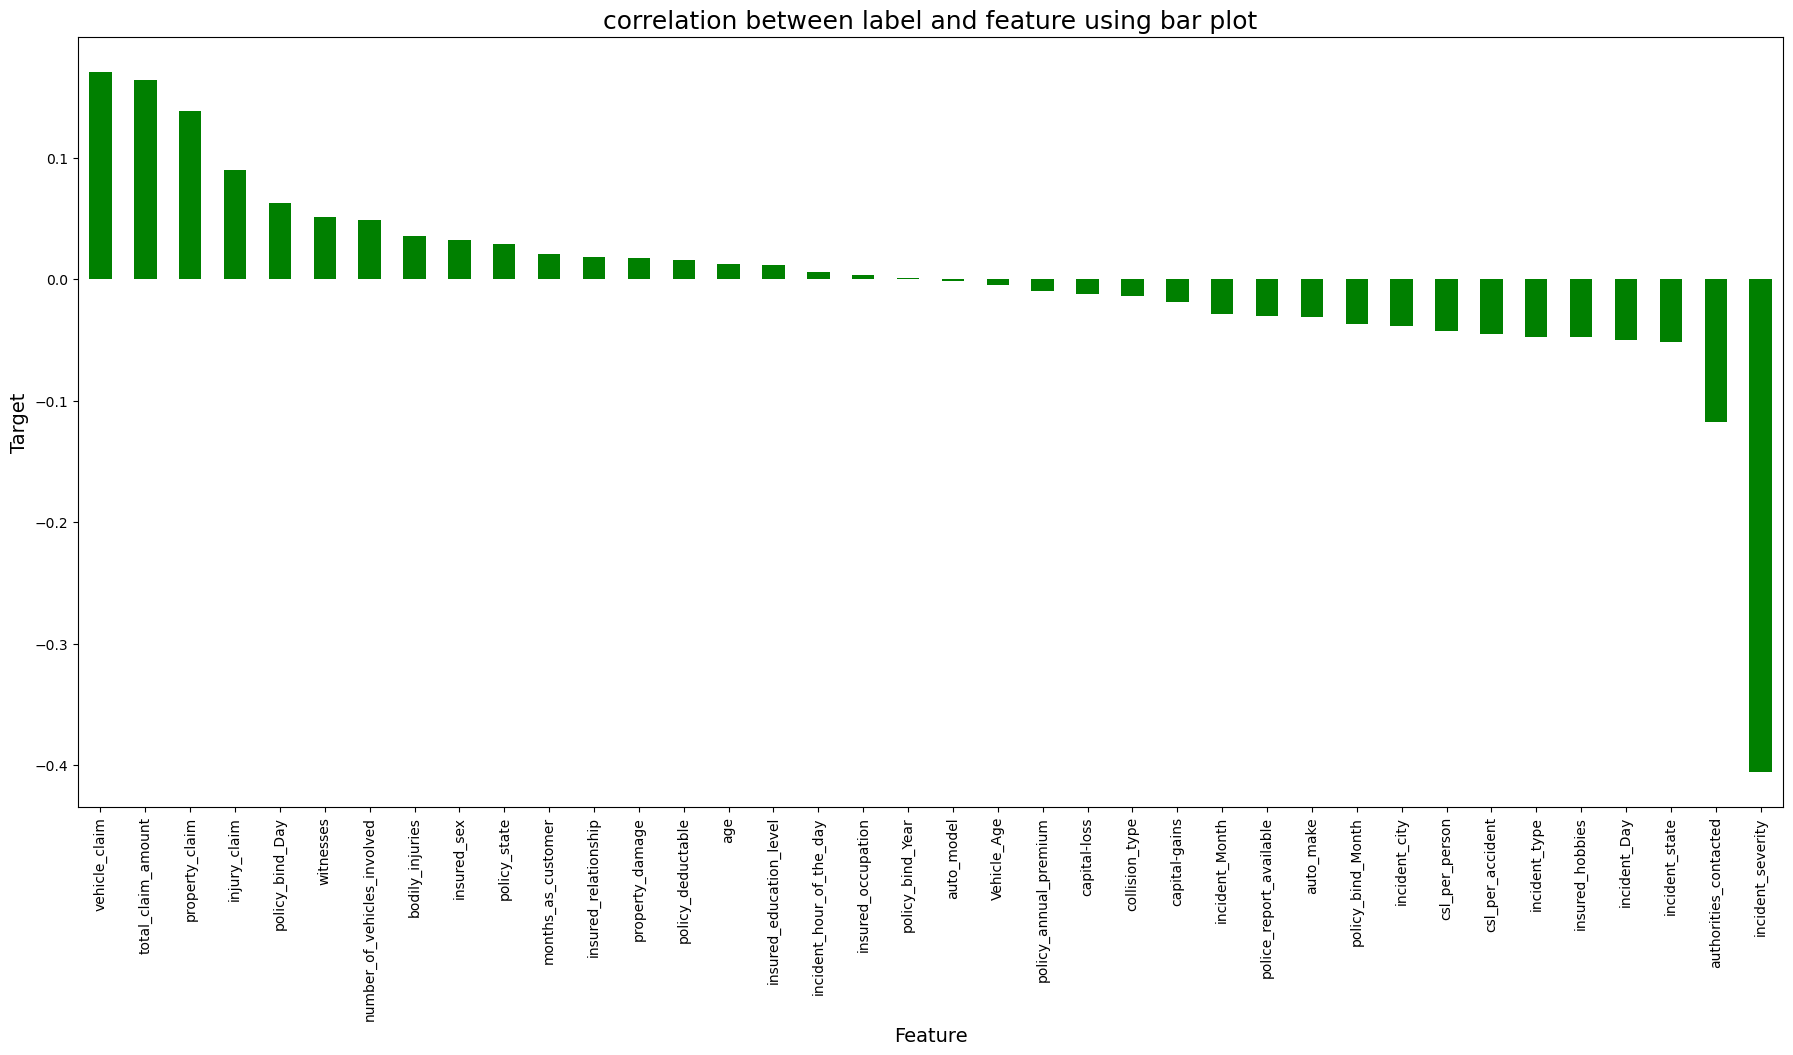

In [116]:
plt.figure(figsize=(22,10))
new_df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

Since the heatmap did not provide a clear picture of the positive and negative correlation columns, we generated this bar plot. 

From the bar plot, we observe that more than half of the feature columns are positively correlated with our target label, while the remaining features are negatively correlated with the label column. 

This indicates that all these features are essential for predicting our classification label

# Splitting the dataset into Features and Target

In [117]:
x = new_df.drop("fraud_reported", axis=1)
y = new_df["fraud_reported"]

In [118]:
# Dimension of x
x.shape

(996, 38)

In [119]:
# Dimension of y
y.shape

(996,)

## Feature Scaling using Standard Scaler

In [120]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,csl_per_person,csl_per_accident,Vehicle_Age
0,1.074671,0.987190,1.186130,-0.224722,0.621371,1.075102,0.531088,-1.162296,1.280299,-1.436113,...,0.857248,-1.644810,0.179080,0.980399,1.686176,1.153049,-0.951204,-0.137684,-0.276860,0.182338
1,0.204846,0.330455,-0.018137,1.409024,-0.251375,1.075102,0.531088,-0.166257,0.928186,-0.246617,...,0.360986,-0.657437,1.315157,-0.163352,0.599693,0.690948,-0.951204,-0.137684,-0.276860,-0.316587
2,-0.612790,-1.092470,1.186130,1.409024,0.647301,-0.930144,1.557206,1.078792,-1.360550,0.348131,...,-0.631538,0.958263,-1.070604,0.694461,-0.215170,0.806473,0.958875,-1.066352,-0.973203,-0.316587
3,0.448397,0.221000,-1.222403,1.409024,0.658123,-0.930144,1.557206,-1.411305,-1.360550,0.942878,...,-0.879669,1.317308,1.087942,-0.449290,-1.573274,-0.579830,-0.951204,-0.137684,-0.276860,-1.480744
4,0.204846,0.549367,-1.222403,-0.224722,1.358059,1.075102,-1.521148,1.078792,-1.360550,0.942878,...,-1.624063,1.048024,-1.070604,-0.163352,1.686176,0.228847,0.958875,1.410096,1.464000,-0.649203


The data has now been scaled.

In the heat map we found some features have high correlation between each other which means multicollinearity exists. so we will check the VIF value to solve multicollinearity problem.

# Check Multicollinearity

In [121]:
# Find varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [122]:
calc_vif(x)

,Features,VIF values
0,months_as_customer,6.854778
1,age,6.855611
2,policy_state,1.033882
3,policy_deductable,1.043671
4,policy_annual_premium,1.037404
5,insured_sex,1.034223
6,insured_education_level,1.052072
7,insured_occupation,1.017266
8,insured_hobbies,1.051333
9,insured_relationship,1.051518


We can observe that some columns have VIF above 10 that means they cause multicollinearity problem. Let's drop the such columns that have high VIF value amongst all the columns.

In [123]:
# Drop total_claim_amount column as it contains high VIF value
x.drop(["total_claim_amount"],axis=1,inplace=True)

In [124]:
calc_vif(x)

,Features,VIF values
0,months_as_customer,6.854778
1,age,6.855611
2,policy_state,1.033882
3,policy_deductable,1.043671
4,policy_annual_premium,1.037404
5,insured_sex,1.034223
6,insured_education_level,1.052072
7,insured_occupation,1.017266
8,insured_hobbies,1.051333
9,insured_relationship,1.051518


In [125]:
# Dropp csl_per_accident column
x.drop(["csl_per_accident"],axis=1,inplace=True)

In [126]:
calc_vif(x)

,Features,VIF values
0,months_as_customer,6.852492
1,age,6.853242
2,policy_state,1.032753
3,policy_deductable,1.043526
4,policy_annual_premium,1.037043
5,insured_sex,1.029242
6,insured_education_level,1.052068
7,insured_occupation,1.017154
8,insured_hobbies,1.049972
9,insured_relationship,1.047160


Now multicollinearity issue is solved since all the VIF values are less than 10.

In [127]:
y.value_counts()

fraud_reported
0    750
1    246
Name: count, dtype: int64

As there is a huge difference between the count of 0 & 1, the data is not balanced. As this is a classification problem we will balance using oversampling method.

# SMOTE

In [194]:
# Oversampling the data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\KSREEHARSHA\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [129]:
# Checking value count of target column
y.value_counts()

fraud_reported
0    750
1    246
Name: count, dtype: int64

<Axes: ylabel='count'>

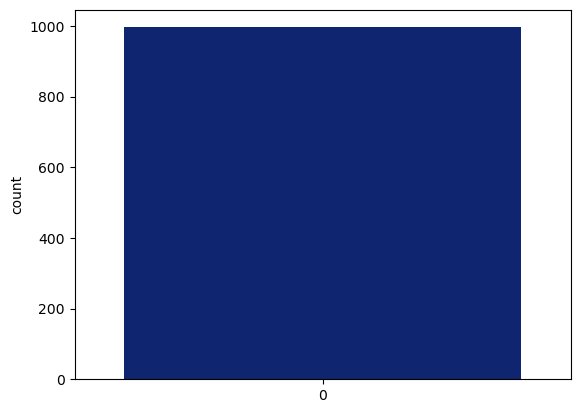

In [130]:
# Visualizing the data after oversampling
sns.countplot(y,palette="dark")

Now our data is balanced, so we can build our models.

# Machine Learning

### Finding best random state

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier()

For Test size .30

In [137]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.822742474916388  on Random_state  159


For Test size .20

In [138]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.85  on Random_state  9


We got the best accuracy as 85 for test size 0.2.

## Feature importance bar graph

,Importance
Features,
incident_severity,0.188
insured_hobbies,0.087
property_claim,0.046
vehicle_claim,0.045
policy_annual_premium,0.042
months_as_customer,0.038
injury_claim,0.038
age,0.033
incident_Day,0.032


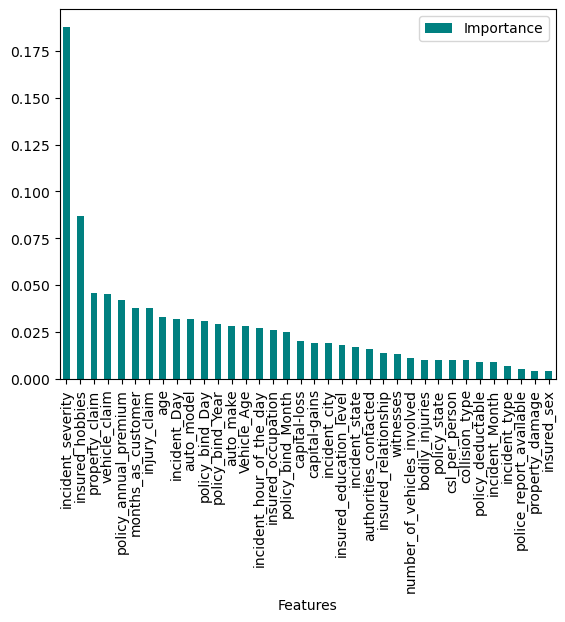

In [139]:
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

This bar plot shows the importance of features using random forest algorithm on predicting our Target variable.

## Create train_test split

In [140]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [141]:
# creating a function to run all the classifiers

def classifier(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=80)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\n Accuracy Score - Cross Validation Score is", result)

### Logistic Regression

In [142]:
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 76.5

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       150
           1       0.55      0.34      0.42        50

    accuracy                           0.77       200
   macro avg       0.68      0.62      0.64       200
weighted avg       0.74      0.77      0.74       200

Cross Validation Score: 78.21356783919597

 Accuracy Score - Cross Validation Score is -1.7135678391959743


### Naive Bayes

In [143]:
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 75.5

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       150
           1       0.51      0.58      0.54        50

    accuracy                           0.76       200
   macro avg       0.68      0.70      0.69       200
weighted avg       0.77      0.76      0.76       200

Cross Validation Score: 74.69748743718593

 Accuracy Score - Cross Validation Score is 0.8025125628140728


### SVC Classifier

In [144]:
model = SVC(kernel='rbf')
classifier(model, x, y)

Accuracy Score: 75.0

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       150
           1       0.50      0.04      0.07        50

    accuracy                           0.75       200
   macro avg       0.63      0.51      0.46       200
weighted avg       0.69      0.75      0.66       200

Cross Validation Score: 74.79698492462312

 Accuracy Score - Cross Validation Score is 0.20301507537688224


In [145]:
model = SVC(kernel='linear')
classifier(model, x, y)

Accuracy Score: 79.5

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       150
           1       0.58      0.64      0.61        50

    accuracy                           0.80       200
   macro avg       0.73      0.74      0.74       200
weighted avg       0.80      0.80      0.80       200

Cross Validation Score: 78.91758793969849

 Accuracy Score - Cross Validation Score is 0.5824120603015075


In [146]:
model = SVC(kernel='poly')
classifier(model, x, y)

Accuracy Score: 74.5

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85       150
           1       0.33      0.02      0.04        50

    accuracy                           0.74       200
   macro avg       0.54      0.50      0.45       200
weighted avg       0.65      0.74      0.65       200

Cross Validation Score: 75.00050251256282

 Accuracy Score - Cross Validation Score is -0.500502512562818


### Decision Tree Classifier

In [147]:
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 75.0

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       150
           1       0.50      0.50      0.50        50

    accuracy                           0.75       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.75      0.75      0.75       200

Cross Validation Score: 78.01155778894471

 Accuracy Score - Cross Validation Score is -3.011557788944714


### KNeighbors Classifier

In [188]:
model = KNeighborsClassifier()
classifier(model, x.values, y.values)

Accuracy Score: 72.5

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       150
           1       0.40      0.20      0.27        50

    accuracy                           0.73       200
   macro avg       0.59      0.55      0.55       200
weighted avg       0.68      0.72      0.69       200

Cross Validation Score: 72.18844221105527

 Accuracy Score - Cross Validation Score is 0.3115577889447252


### SGD Classifier

In [149]:
model = SGDClassifier()
classifier(model, x, y)

Accuracy Score: 75.0

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       150
           1       0.50      0.42      0.46        50

    accuracy                           0.75       200
   macro avg       0.66      0.64      0.65       200
weighted avg       0.74      0.75      0.74       200

Cross Validation Score: 72.1854271356784

 Accuracy Score - Cross Validation Score is 2.8145728643216046


### Random Forest Classifier

In [150]:
model = RandomForestClassifier()
classifier(model, x, y)

Accuracy Score: 79.0

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       150
           1       0.63      0.38      0.48        50

    accuracy                           0.79       200
   macro avg       0.73      0.65      0.67       200
weighted avg       0.77      0.79      0.77       200

Cross Validation Score: 76.50502512562814

 Accuracy Score - Cross Validation Score is 2.494974874371863


In [151]:
model = RandomForestClassifier(random_state=80)
classifier(model, x, y)

Accuracy Score: 77.0

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       150
           1       0.56      0.36      0.44        50

    accuracy                           0.77       200
   macro avg       0.69      0.63      0.65       200
weighted avg       0.75      0.77      0.75       200

Cross Validation Score: 77.50954773869347

 Accuracy Score - Cross Validation Score is -0.5095477386934704


### ExtraTrees Classifier

In [152]:
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 78.5

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       150
           1       0.67      0.28      0.39        50

    accuracy                           0.79       200
   macro avg       0.73      0.62      0.63       200
weighted avg       0.77      0.79      0.75       200

Cross Validation Score: 77.00603015075377

 Accuracy Score - Cross Validation Score is 1.493969849246227


In [153]:
model = ExtraTreesClassifier(random_state=80)
classifier(model, x, y)

Accuracy Score: 77.0

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       150
           1       0.62      0.20      0.30        50

    accuracy                           0.77       200
   macro avg       0.70      0.58      0.58       200
weighted avg       0.74      0.77      0.72       200

Cross Validation Score: 76.30502512562813

 Accuracy Score - Cross Validation Score is 0.6949748743718658


### AdaBoost Classifier

In [154]:
model = AdaBoostClassifier()
classifier(model, x, y)

Accuracy Score: 79.5

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       150
           1       0.62      0.46      0.53        50

    accuracy                           0.80       200
   macro avg       0.73      0.68      0.70       200
weighted avg       0.78      0.80      0.78       200

Cross Validation Score: 80.42211055276383

 Accuracy Score - Cross Validation Score is -0.9221105527638258


### Gradient Boosting Classifier

In [155]:
model = GradientBoostingClassifier()
classifier(model, x, y)

Accuracy Score: 83.0

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       150
           1       0.66      0.66      0.66        50

    accuracy                           0.83       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.83      0.83      0.83       200

Cross Validation Score: 80.52361809045226

 Accuracy Score - Cross Validation Score is 2.47638190954774


By comparing all the above models, ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models.

# Hyper parameter tuning

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=80)

In [157]:
x_test.shape

(200, 36)

In [158]:
y_test.shape

(200,)

In [159]:
x_train.shape

(796, 36)

In [160]:
y_train.shape

(796,)

In [161]:
#ExtraTreesClassifier

In [162]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [None, 80],
              'n_estimators': [100, 200, 300]}

In [163]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [164]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [None, 80]})

In [165]:
GCV.best_params_      # print the best parameters found by GridSearchCV

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': None}

In [166]:
final_modelc = ExtraTreesClassifier(criterion = 'gini', max_features = 'log2', n_estimators = 200, n_jobs = -2 , random_state = None)   # final model with best parameters

In [167]:
final_fitc = final_modelc.fit(x_train,y_train)   # final fit

In [168]:
final_predc = final_modelc.predict(x_test)   # predict with best parameters

In [169]:
best_acc_score = (accuracy_score(y_test, final_predc))*100    # check accuracy score
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  75.0


In [170]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 75.80251256281407


We got the final accuracy score of 95% and Cross Validation Score of 91.3% which is good

In [171]:
# Final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\n Classification Report:\n", final_class_report)


 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       150
           1       0.50      0.14      0.22        50

    accuracy                           0.75       200
   macro avg       0.63      0.55      0.53       200
weighted avg       0.70      0.75      0.69       200



## Print Confusion Matrix

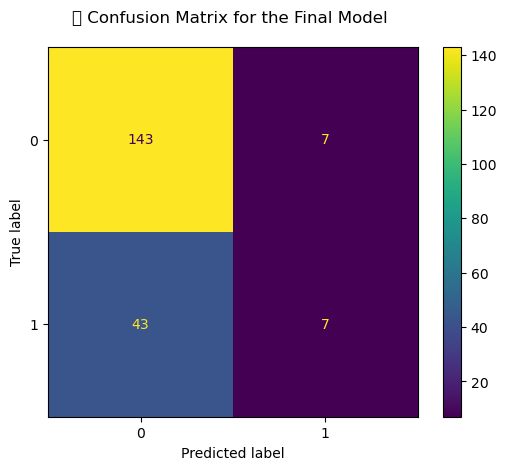

In [190]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.style.use('default')
class_names = df.columns
#metrics.plot_confusion_matrix(final_modelc, x_test, y_test, cmap='mako')
ConfusionMatrixDisplay.from_estimator(final_modelc, x_test, y_test)
plt.title('\t Confusion Matrix for the Final Model \n')
plt.show()

# AUC ROC curve

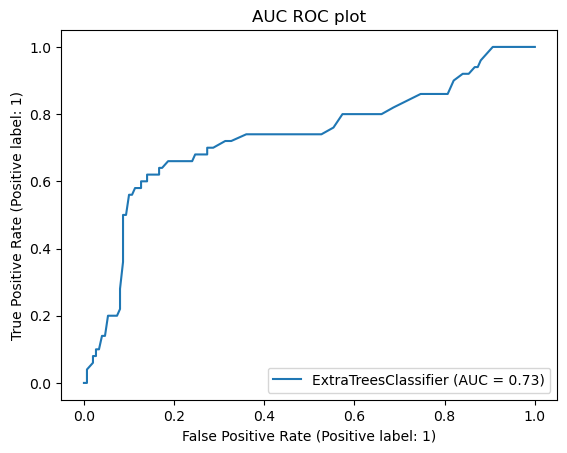

In [183]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
#plot_roc_curve(final_modelc, x_test, y_test)
RocCurveDisplay.from_estimator(final_modelc, x_test, y_test)

plt.title("AUC ROC plot")
plt.show()

We got final accuracy score of 95% and Cross Validation Score of 91.3% and also AUC score is 0.99 which are really good values.

# Save the model in pickle Format

In [179]:
# pickeling or serialization of a file
import pickle
filename = 'Insurance_Claims_Fraud_Detection_Final_Model.pkl'
pickle.dump(final_modelc, open(filename, 'wb'))

# Prediction Conclusion:

In [180]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,1
...,...,...
195,0,0
196,0,0
197,0,0
198,1,0


Saving the comparison file as a csv file.

In [181]:
df_comparisonc.to_csv('Insurance_Claims_Fraud_Detection_Prediction_Results.csv')